In [47]:
import pandas as pd
import numpy as np
import json

In [48]:
tpm_fp = "/Users/cheyanne/Library/Mobile Documents/com~apple~CloudDocs/github_repos/CPBS7602/data/10tissues_5Kgenes_tpmout.csv"
sample_key_fp = "/Users/cheyanne/Library/Mobile Documents/com~apple~CloudDocs/github_repos/CPBS7602/data/sample_keys.csv"
gene_dict_fp = ("/Users/cheyanne/Library/Mobile Documents/com~apple~CloudDocs/github_repos/CPBS7602/data/gene_dict.json")

In [49]:
tpm_df = pd.read_csv(tpm_fp, index_col=0)
display(tpm_df)

RP11-3J1.1  TMEM167B  RNA5SP19  RP11-388G3.1  CH17-264B6.4  \
sample1         0.00000     62.89    0.0000        0.0000           0.0   
sample2         0.00000     32.36    0.0000        0.0000           0.0   
sample3         0.00000     55.31    0.0000        0.0655           0.0   
sample4         0.00000     43.99    0.0000        0.0000           0.0   
sample5         0.06062     22.74    0.0000        0.0000           0.0   
...                 ...       ...       ...           ...           ...   
sample12458     0.00000     34.19    0.0000        0.0000           0.0   
sample12459     0.00000     37.28    0.0000        0.0000           0.0   
sample12460     0.00000     45.68    0.0000        0.0000           0.0   
sample12461     0.10600     23.48    0.3116        0.0326           0.0   
sample12462     0.00000     47.25    0.0000        0.0000           0.0   

             BTG4P1  snoMe28S-Am2634   Y_RNA  ATXN1L  USP17L25  ...  COX7A2L  \
sample1         0.0           0.0000  0.5607  36.470       0.0  ...    38.49   
sample2         0.0           0.0000  0.0000  13.910       0.0  ...    18.77   
sample3         0.0           0.0000  0.0000  46.640       0.0  ...    37.54   
sample4         0.0           0.0000  0.0000  21.410       0.0  ...    33.83   
sample5         0.0           0.0000  0.0000   7.623       0.0  ...    15.18   
...             ...              ...     ...     ...       ...  ...      ...   
sample12458     0.0           0.5717  0.0000  18.660       0.0  ...    20.94   
sample12459     0.0           0.0000  0.0000  24.860       0.0  ...    17.94   
sample12460     0.0           0.0000  0.0000  27.480       0.0  ...    31.05   
sample12461     0.0           0.0000  0.0000   9.561       0.0  ...     9.23   
sample12462     0.0           0.0000  0.0000  31.710       0.0  ...    29.61   

             MIR500B   OR4G1P  RP11-76H14.2  RP11-43D4.3  MTND2P18  snoU13.4  \
sample1          0.0  0.00000        1.0240      0.00000       0.0       0.0   
sample2          0.0  0.00000        0.1547      0.00000       0.0       0.0   
sample3          0.0  0.07284        0.6735      0.00000       0.0       0.0   
sample4          0.0  0.00000        0.0000      0.12770       0.0       0.0   
sample5          0.0  0.00000        0.0000      0.00000       0.0       0.0   
...              ...      ...           ...          ...       ...       ...   
sample12458      0.0  0.00000        0.0000      0.00000       0.0       0.0   
sample12459      0.0  0.00000        0.2411      0.05331       0.0       0.0   
sample12460      0.0  0.00000        0.5943      0.06570       0.0       0.0   
sample12461      0.0  0.00000        0.0000      0.00000       0.0       0.0   
sample12462      0.0  0.00000        0.1434      0.00000       0.0       0.0   

             MIR300  DEFB126  OR8B5P  
sample1         0.0      0.0     0.0  
sample2         0.0      0.0     0.0  
sample3         0.0      0.0     0.0  
sample4         0.0      0.0     0.0  
sample5         0.0      0.0     0.0  
...             ...      ...     ...  
sample12458     0.0      0.0     0.0  
sample12459     0.0      0.0     0.0  
sample12460     0.0      0.0     0.0  
sample12461     0.0      0.0     0.0  
sample12462     0.0      0.0     0.0  

[12462 rows x 5000 columns]

In [50]:
sample_df = pd.read_csv(sample_key_fp, index_col=2)
display(sample_df)

SAMPID       Sample
Tissue                                               
Adipose Tissue  GTEX-1117F-0226-SM-5GZZ7      sample1
Muscle          GTEX-1117F-0426-SM-5EGHI      sample2
Blood Vessel    GTEX-1117F-0526-SM-5EGHJ      sample3
Blood Vessel    GTEX-1117F-0626-SM-5N9CS      sample4
Heart           GTEX-1117F-0726-SM-5GIEN      sample5
...                                  ...          ...
Thyroid          GTEX-ZZPU-1326-SM-5GZWS  sample12458
Esophagus        GTEX-ZZPU-1826-SM-5E43L  sample12459
Blood Vessel     GTEX-ZZPU-2426-SM-5E44I  sample12460
Muscle           GTEX-ZZPU-2626-SM-5E45Y  sample12461
Adipose Tissue   GTEX-ZZPU-2726-SM-5NQ8O  sample12462

[12462 rows x 2 columns]

### Scale data for PCA

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
tpm_scaled = scaler.fit_transform(tpm_df)
print(tpm_scaled)

[[-0.18719173  1.87870463 -0.1496494  ... -0.06947065 -0.14343198
  -0.1297072 ]
 [-0.18719173 -0.14294478 -0.1496494  ... -0.06947065 -0.14343198
  -0.1297072 ]
 [-0.18719173  1.37676875 -0.1496494  ... -0.06947065 -0.14343198
  -0.1297072 ]
 ...
 [-0.18719173  0.73908503 -0.1496494  ... -0.06947065 -0.14343198
  -0.1297072 ]
 [ 3.14443762 -0.73096465  3.72049107 ... -0.06947065 -0.14343198
  -0.1297072 ]
 [-0.18719173  0.84304801 -0.1496494  ... -0.06947065 -0.14343198
  -0.1297072 ]]


In [53]:
tpm_scaled = pd.DataFrame(tpm_scaled, index=sample_df.index, columns=tpm_df.columns)
display(tpm_scaled)

RP11-3J1.1  TMEM167B  RNA5SP19  RP11-388G3.1  CH17-264B6.4  \
Tissue                                                                       
Adipose Tissue   -0.187192  1.878705 -0.149649     -0.330800     -0.163793   
Muscle           -0.187192 -0.142945 -0.149649     -0.330800     -0.163793   
Blood Vessel     -0.187192  1.376769 -0.149649      2.257657     -0.163793   
Blood Vessel     -0.187192  0.627176 -0.149649     -0.330800     -0.163793   
Heart             1.718123 -0.779966 -0.149649     -0.330800     -0.163793   
...                    ...       ...       ...           ...           ...   
Thyroid          -0.187192 -0.021765 -0.149649     -0.330800     -0.163793   
Esophagus        -0.187192  0.182850 -0.149649     -0.330800     -0.163793   
Blood Vessel     -0.187192  0.739085 -0.149649     -0.330800     -0.163793   
Muscle            3.144438 -0.730965  3.720491      0.957501     -0.163793   
Adipose Tissue   -0.187192  0.843048 -0.149649     -0.330800     -0.163793   

                  BTG4P1  snoMe28S-Am2634     Y_RNA    ATXN1L  USP17L25  ...  \
Tissue                                                                   ...   
Adipose Tissue -0.033556        -0.131723  7.039768  2.275804       0.0  ...   
Muscle         -0.033556        -0.131723 -0.154864 -0.226124       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  3.403667       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  0.605634       0.0  ...   
Heart          -0.033556        -0.131723 -0.154864 -0.923359       0.0  ...   
...                  ...              ...       ...       ...       ...  ...   
Thyroid        -0.033556         3.320268 -0.154864  0.300656       0.0  ...   
Esophagus      -0.033556        -0.131723 -0.154864  0.988243       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  1.278803       0.0  ...   
Muscle         -0.033556        -0.131723 -0.154864 -0.708432       0.0  ...   
Adipose Tissue -0.033556        -0.131723 -0.154864  1.747915       0.0  ...   

                 COX7A2L   MIR500B    OR4G1P  RP11-76H14.2  RP11-43D4.3  \
Tissue                                                                    
Adipose Tissue  1.008925 -0.025749 -0.205672      4.390730    -0.374691   
Muscle         -0.591819 -0.025749 -0.205672      0.155128    -0.374691   
Blood Vessel    0.931810 -0.025749  5.301855      2.682944    -0.374691   
Blood Vessel    0.630656 -0.025749 -0.205672     -0.598637     1.619849   
Heart          -0.883232 -0.025749 -0.205672     -0.598637    -0.374691   
...                  ...       ...       ...           ...          ...   
Thyroid        -0.415672 -0.025749 -0.205672     -0.598637    -0.374691   
Esophagus      -0.659193 -0.025749 -0.205672      0.576105     0.457955   
Blood Vessel    0.404993 -0.025749 -0.205672      2.297047     0.651474   
Muscle         -1.366216 -0.025749 -0.205672     -0.598637    -0.374691   
Adipose Tissue  0.288103 -0.025749 -0.205672      0.100069    -0.374691   

                MTND2P18  snoU13.4    MIR300   DEFB126    OR8B5P  
Tissue                                                            
Adipose Tissue -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Muscle         -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Heart          -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
...                  ...       ...       ...       ...       ...  
Thyroid        -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Esophagus      -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Muscle         -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Adipose Tissue -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  

[12462 rows x 5000 columns]

### Perform PCA with 2 components

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(tpm_scaled)

In [56]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=tpm_scaled.index)

In [57]:
display(pca_df)

PC1        PC2
Tissue                              
Adipose Tissue  15.605460  11.144509
Muscle          -1.688275  -8.284006
Blood Vessel    15.094485   7.127181
Blood Vessel    12.149118   5.918442
Heart           -3.131829  -9.614855
...                   ...        ...
Thyroid          9.273012   7.824328
Esophagus        4.253530  -2.762619
Blood Vessel     8.394482  -0.186674
Muscle          -4.493456 -11.463552
Adipose Tissue   7.518582  -2.173323

[12462 rows x 2 columns]

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

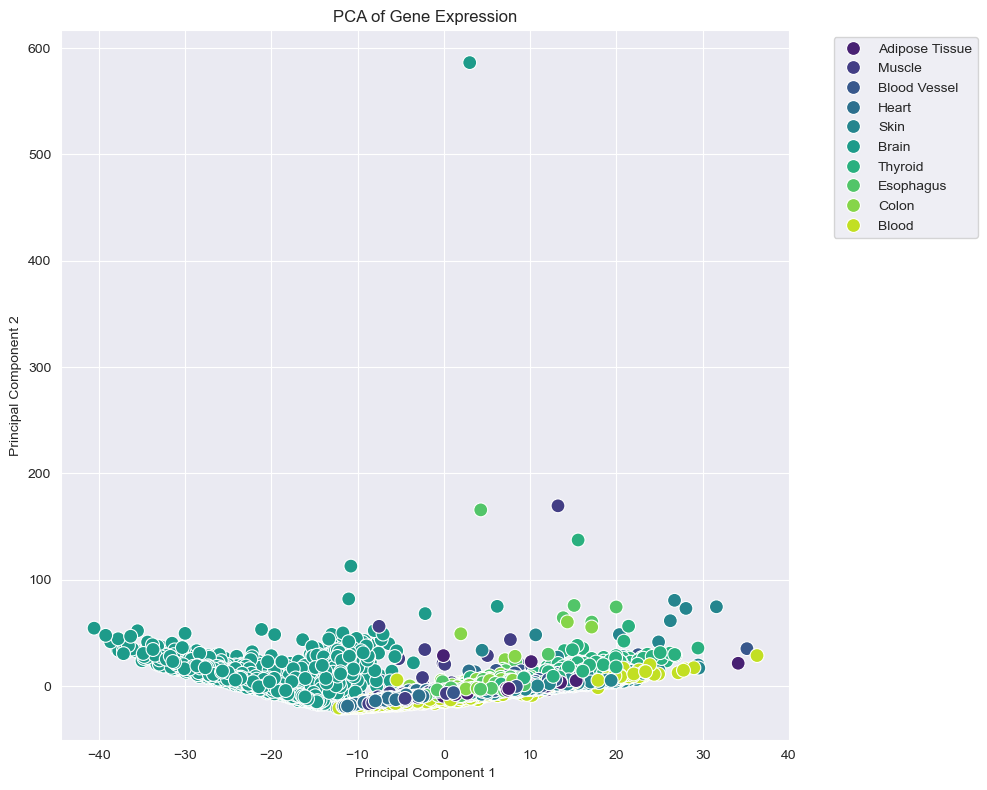

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue=pca_df.index,
    data=pca_df, palette='viridis', s=100
)
plt.title('PCA of Gene Expression')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
print("Variance Explained by PCA (Scaled):", pca.explained_variance_ratio_)

Variance Explained by PCA (Scaled): [0.0328594  0.03082123]


In [61]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

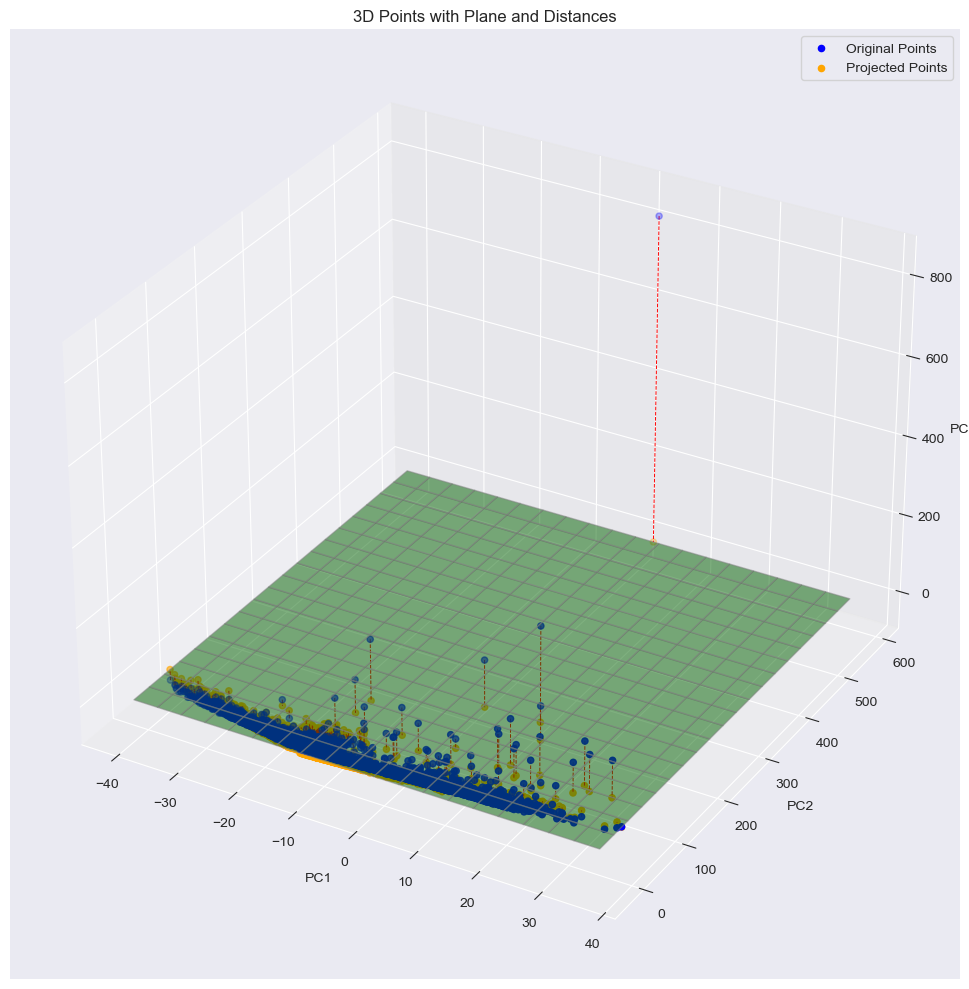

In [62]:
tissue_types = np.unique(tpm_scaled.index)
# Step 1: Fit PCA to the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(tpm_scaled)

# Step 2: Fit a plane using Linear Regression
regressor = LinearRegression()
regressor.fit(X_pca[:, :2], X_pca[:, 2])  # Fit PC1 and PC2 to PC3

# Create a mesh grid for the plane
x_plane = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 20)
y_plane = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 20)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.ravel(), y_plane.ravel()]).reshape(x_plane.shape)

# Step 3: Project points onto the plane
# Plane equation: z = Ax + By + C
A, B = regressor.coef_
C = regressor.intercept_

def project_onto_plane(x, y, z, A, B, C):
    t = (A * x + B * y + C - z) / (A**2 + B**2 + 1)
    x_proj = x - A * t
    y_proj = y - B * t
    z_proj = z + t
    return x_proj, y_proj, z_proj

X_proj = np.array([project_onto_plane(x, y, z, A, B, C) for x, y, z in X_pca])
X_proj = X_proj.reshape(-1, 3)

# Step 4: Plot the data points, plane, and projections
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], color='blue', label='Original Points')

# Plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='green', edgecolor='gray')

# Projection lines
for i in range(len(X_pca)):
    ax.plot(
        [X_pca[i, 0], X_proj[i, 0]],
        [X_pca[i, 1], X_proj[i, 1]],
        [X_pca[i, 2], X_proj[i, 2]],
        color='red', linestyle='--', linewidth=0.7
    )

# Projections
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], color='orange', label='Projected Points')

# Labels and legend
ax.set_title('3D Points with Plane and Distances')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.tight_layout()
plt.show()





### PCA without data scaling with 2 components

In [63]:
tpm_unscaled = tpm_df.values

In [64]:
tpm_unscaled= pd.DataFrame(tpm_unscaled, index=sample_df.index, columns=tpm_df.columns)
display(tpm_unscaled)

RP11-3J1.1  TMEM167B  RNA5SP19  RP11-388G3.1  CH17-264B6.4  \
Tissue                                                                       
Adipose Tissue     0.00000     62.89    0.0000        0.0000           0.0   
Muscle             0.00000     32.36    0.0000        0.0000           0.0   
Blood Vessel       0.00000     55.31    0.0000        0.0655           0.0   
Blood Vessel       0.00000     43.99    0.0000        0.0000           0.0   
Heart              0.06062     22.74    0.0000        0.0000           0.0   
...                    ...       ...       ...           ...           ...   
Thyroid            0.00000     34.19    0.0000        0.0000           0.0   
Esophagus          0.00000     37.28    0.0000        0.0000           0.0   
Blood Vessel       0.00000     45.68    0.0000        0.0000           0.0   
Muscle             0.10600     23.48    0.3116        0.0326           0.0   
Adipose Tissue     0.00000     47.25    0.0000        0.0000           0.0   

                BTG4P1  snoMe28S-Am2634   Y_RNA  ATXN1L  USP17L25  ...  \
Tissue                                                             ...   
Adipose Tissue     0.0           0.0000  0.5607  36.470       0.0  ...   
Muscle             0.0           0.0000  0.0000  13.910       0.0  ...   
Blood Vessel       0.0           0.0000  0.0000  46.640       0.0  ...   
Blood Vessel       0.0           0.0000  0.0000  21.410       0.0  ...   
Heart              0.0           0.0000  0.0000   7.623       0.0  ...   
...                ...              ...     ...     ...       ...  ...   
Thyroid            0.0           0.5717  0.0000  18.660       0.0  ...   
Esophagus          0.0           0.0000  0.0000  24.860       0.0  ...   
Blood Vessel       0.0           0.0000  0.0000  27.480       0.0  ...   
Muscle             0.0           0.0000  0.0000   9.561       0.0  ...   
Adipose Tissue     0.0           0.0000  0.0000  31.710       0.0  ...   

                COX7A2L  MIR500B   OR4G1P  RP11-76H14.2  RP11-43D4.3  \
Tissue                                                                 
Adipose Tissue    38.49      0.0  0.00000        1.0240      0.00000   
Muscle            18.77      0.0  0.00000        0.1547      0.00000   
Blood Vessel      37.54      0.0  0.07284        0.6735      0.00000   
Blood Vessel      33.83      0.0  0.00000        0.0000      0.12770   
Heart             15.18      0.0  0.00000        0.0000      0.00000   
...                 ...      ...      ...           ...          ...   
Thyroid           20.94      0.0  0.00000        0.0000      0.00000   
Esophagus         17.94      0.0  0.00000        0.2411      0.05331   
Blood Vessel      31.05      0.0  0.00000        0.5943      0.06570   
Muscle             9.23      0.0  0.00000        0.0000      0.00000   
Adipose Tissue    29.61      0.0  0.00000        0.1434      0.00000   

                MTND2P18  snoU13.4  MIR300  DEFB126  OR8B5P  
Tissue                                                       
Adipose Tissue       0.0       0.0     0.0      0.0     0.0  
Muscle               0.0       0.0     0.0      0.0     0.0  
Blood Vessel         0.0       0.0     0.0      0.0     0.0  
Blood Vessel         0.0       0.0     0.0      0.0     0.0  
Heart                0.0       0.0     0.0      0.0     0.0  
...                  ...       ...     ...      ...     ...  
Thyroid              0.0       0.0     0.0      0.0     0.0  
Esophagus            0.0       0.0     0.0      0.0     0.0  
Blood Vessel         0.0       0.0     0.0      0.0     0.0  
Muscle               0.0       0.0     0.0      0.0     0.0  
Adipose Tissue       0.0       0.0     0.0      0.0     0.0  

[12462 rows x 5000 columns]

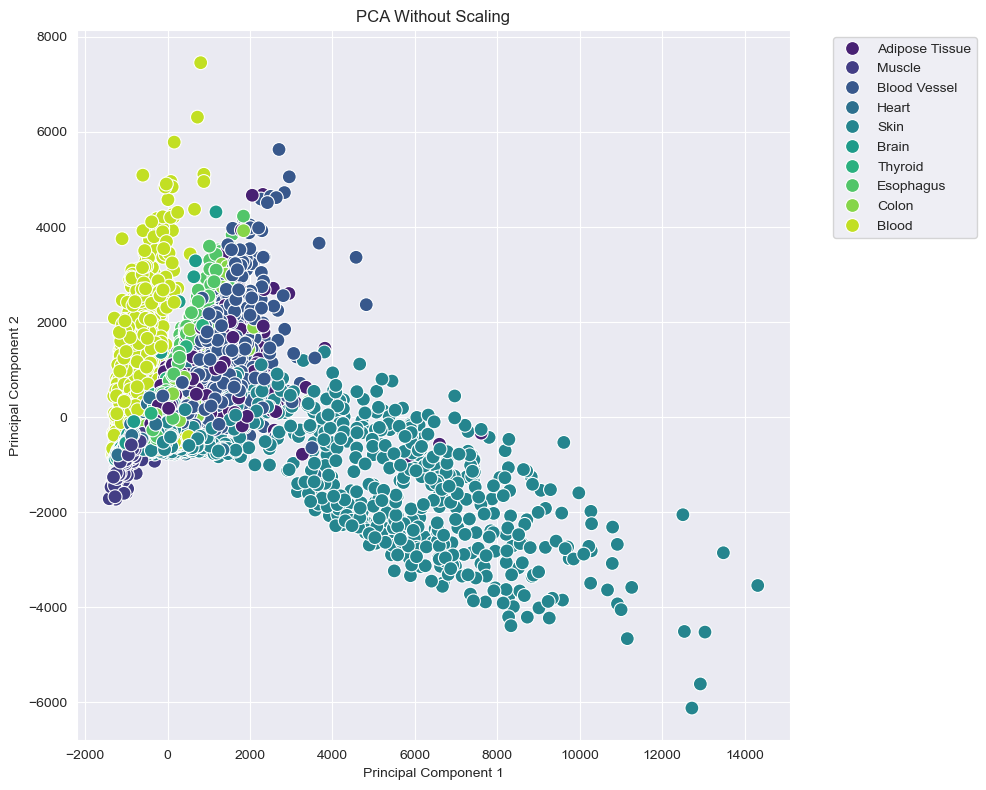

In [65]:
pca = PCA(n_components=2)
principal_components_unscaled = pca.fit_transform(tpm_unscaled)

# Create a DataFrame for plotting
pca_df_unscaled = pd.DataFrame(principal_components_unscaled, columns=['PC1', 'PC2'], index=tpm_unscaled.index)

# Plot unscaled PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue=pca_df_unscaled.index,  # Replace with the correct column
    data=pca_df_unscaled, palette='viridis', s=100
)
plt.title('PCA Without Scaling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
# Before scaling
feature_stats_unscaled = tpm_unscaled.describe()

# After scaling
feature_stats_scaled = pd.DataFrame(scaler.transform(tpm_unscaled), columns=tpm_unscaled.columns).describe()

print("Unscaled Features Stats:\n", feature_stats_unscaled)
print("\nScaled Features Stats:\n", feature_stats_scaled)

Unscaled Features Stats:
          RP11-3J1.1      TMEM167B      RNA5SP19  RP11-388G3.1  CH17-264B6.4  \
count  12462.000000  12462.000000  12462.000000  12462.000000  12462.000000   
mean       0.005956     34.518685      0.012049      0.008371      0.002952   
std        0.031818     15.102136      0.080517      0.025306      0.018022   
min        0.000000      1.395000      0.000000      0.000000      0.000000   
25%        0.000000     23.240000      0.000000      0.000000      0.000000   
50%        0.000000     34.155000      0.000000      0.000000      0.000000   
75%        0.000000     44.420000      0.000000      0.000000      0.000000   
max        0.717200    158.200000      2.246000      0.561300      0.638800   

             BTG4P1  snoMe28S-Am2634         Y_RNA        ATXN1L  USP17L25  \
count  12462.000000     12462.000000  12462.000000  12462.000000   12462.0   
mean       0.000320         0.021815      0.012069     15.948969       0.0   
std        0.009543         

In [67]:
print("Variance Explained by PCA (Unscaled):", pca.explained_variance_ratio_)

Variance Explained by PCA (Unscaled): [0.40299234 0.17125227]


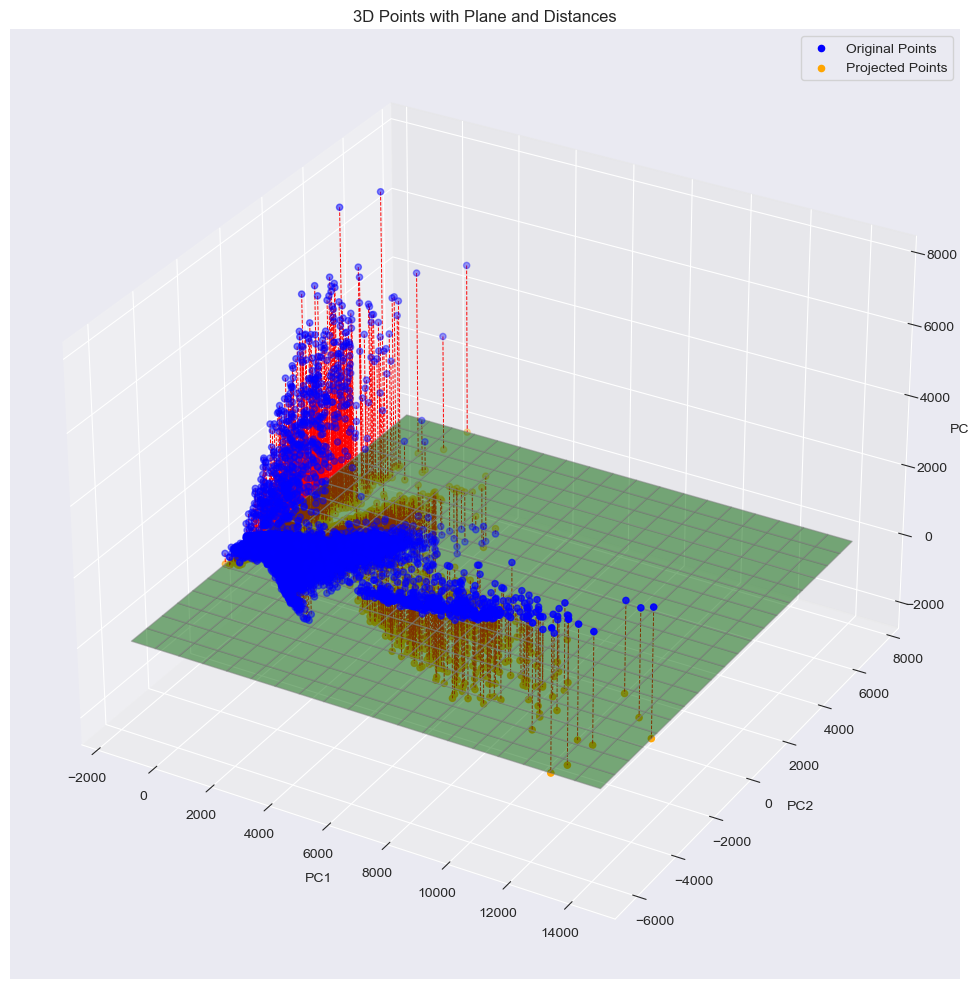

In [68]:
tissue_types = np.unique(tpm_unscaled.index)
# Step 1: Fit PCA to the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(tpm_unscaled)

# Step 2: Fit a plane using Linear Regression
regressor = LinearRegression()
regressor.fit(X_pca[:, :2], X_pca[:, 2])  # Fit PC1 and PC2 to PC3

# Create a mesh grid for the plane
x_plane = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 20)
y_plane = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 20)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.ravel(), y_plane.ravel()]).reshape(x_plane.shape)

# Step 3: Project points onto the plane
# Plane equation: z = Ax + By + C
A, B = regressor.coef_
C = regressor.intercept_

def project_onto_plane(x, y, z, A, B, C):
    t = (A * x + B * y + C - z) / (A**2 + B**2 + 1)
    x_proj = x - A * t
    y_proj = y - B * t
    z_proj = z + t
    return x_proj, y_proj, z_proj

X_proj = np.array([project_onto_plane(x, y, z, A, B, C) for x, y, z in X_pca])
X_proj = X_proj.reshape(-1, 3)

# Step 4: Plot the data points, plane, and projections
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], color='blue', label='Original Points')

# Plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='green', edgecolor='gray')

# Projection lines
for i in range(len(X_pca)):
    ax.plot(
        [X_pca[i, 0], X_proj[i, 0]],
        [X_pca[i, 1], X_proj[i, 1]],
        [X_pca[i, 2], X_proj[i, 2]],
        color='red', linestyle='--', linewidth=0.7
    )

# Projections
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], color='orange', label='Projected Points')

# Labels and legend
ax.set_title('3D Points with Plane and Distances')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.tight_layout()
plt.show()


### Exploring the unscaled PCA data in conjunction with the scaled since it has better separation for 3 principle components along PC1

In [69]:
from mpl_toolkits.mplot3d import Axes3D

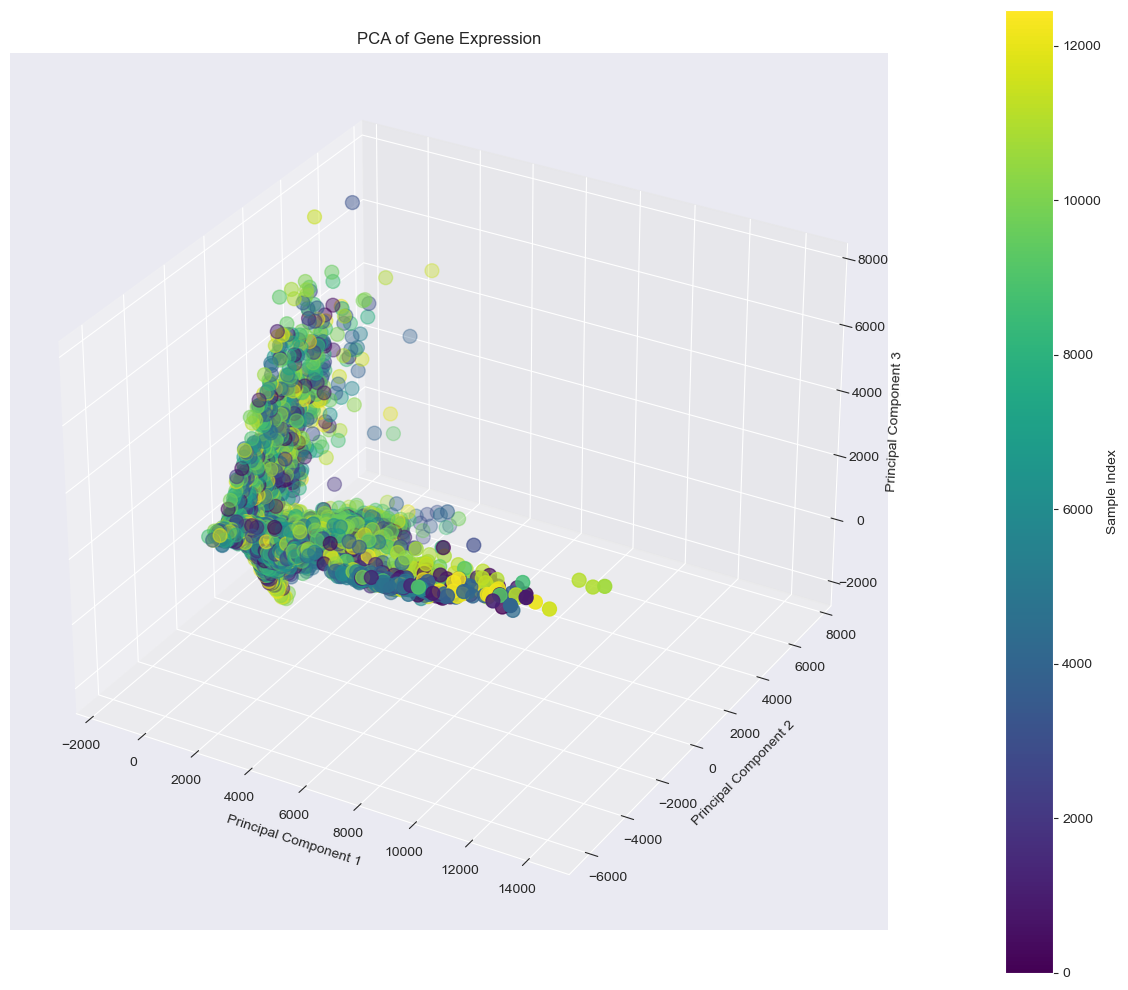

Variance Explained by PCA (Scaled): [0.40299234 0.17125227 0.12076182]


In [70]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(tpm_unscaled)

# Create DataFrame for PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'], index=tpm_unscaled.index)

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap for hue if metadata is unavailable
scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=range(len(pca_df.index)), cmap='viridis', s=100
)

# Set axis labels
ax.set_title('PCA of Gene Expression')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Sample Index')

plt.tight_layout()
plt.show()

# Print variance explained
print("Variance Explained by PCA (Scaled):", pca.explained_variance_ratio_)

In [71]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(tpm_unscaled)

# Create DataFrame for PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=tpm_unscaled.index)

# Print variance explained
print("Variance Explained by PCA (Scaled):", pca.explained_variance_ratio_)

Variance Explained by PCA (Scaled): [0.40299234 0.17125227 0.12076182 0.07715299]


In [72]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(tpm_unscaled)

# Create DataFrame for PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=tpm_unscaled.index)

# Print variance explained
print("Variance Explained by PCA (Scaled):", pca.explained_variance_ratio_)

Variance Explained by PCA (Scaled): [0.40299234 0.17125227 0.12076182 0.07715299 0.06484771]


### Plot the unscaled data in a UMAP

In [73]:
import umap

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


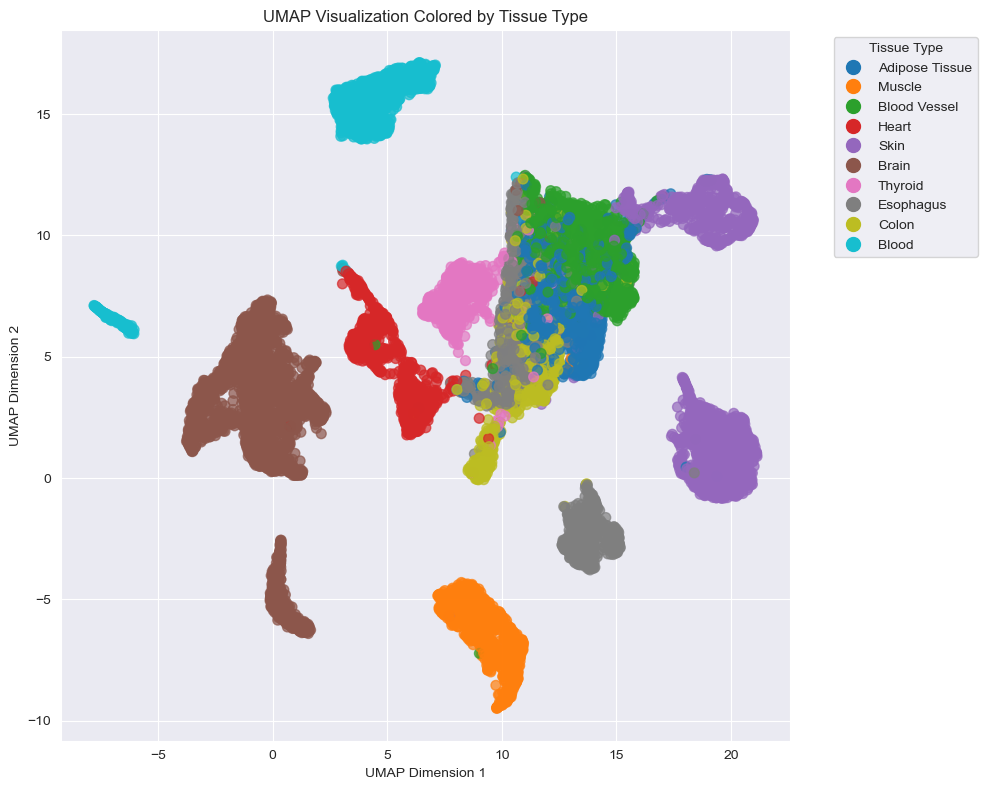

In [74]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_unscaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_unscaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


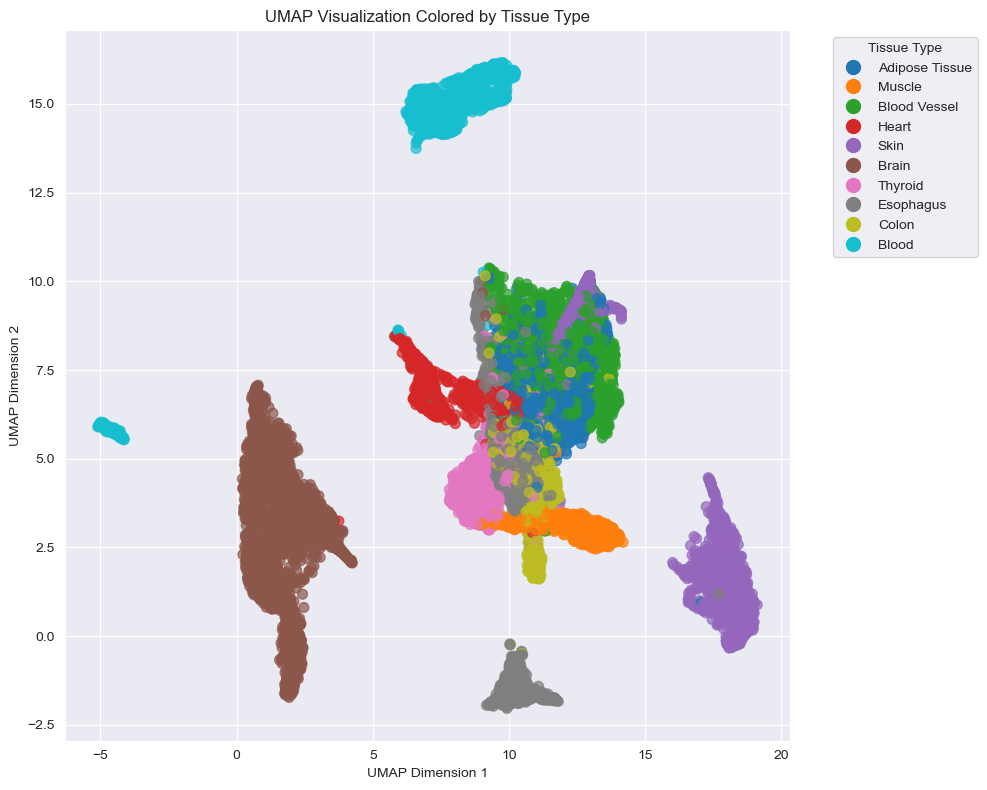

In [75]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_unscaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_unscaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


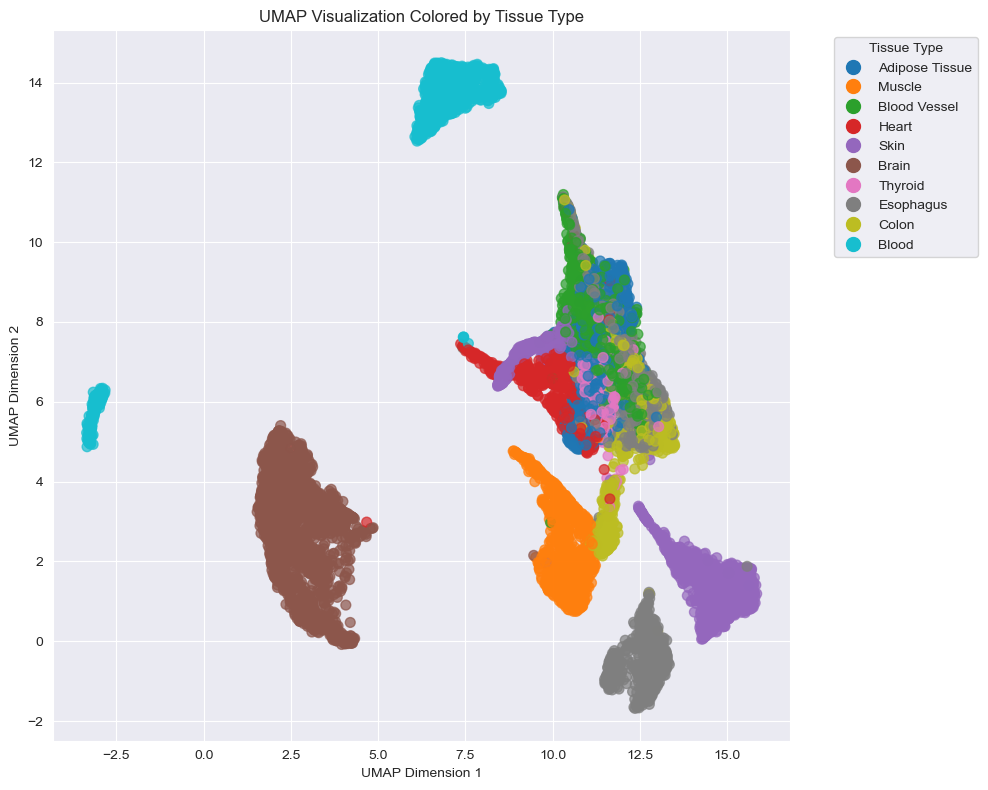

In [76]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=4, n_neighbors=15, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_unscaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_unscaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Apply UMAP for scaled data

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


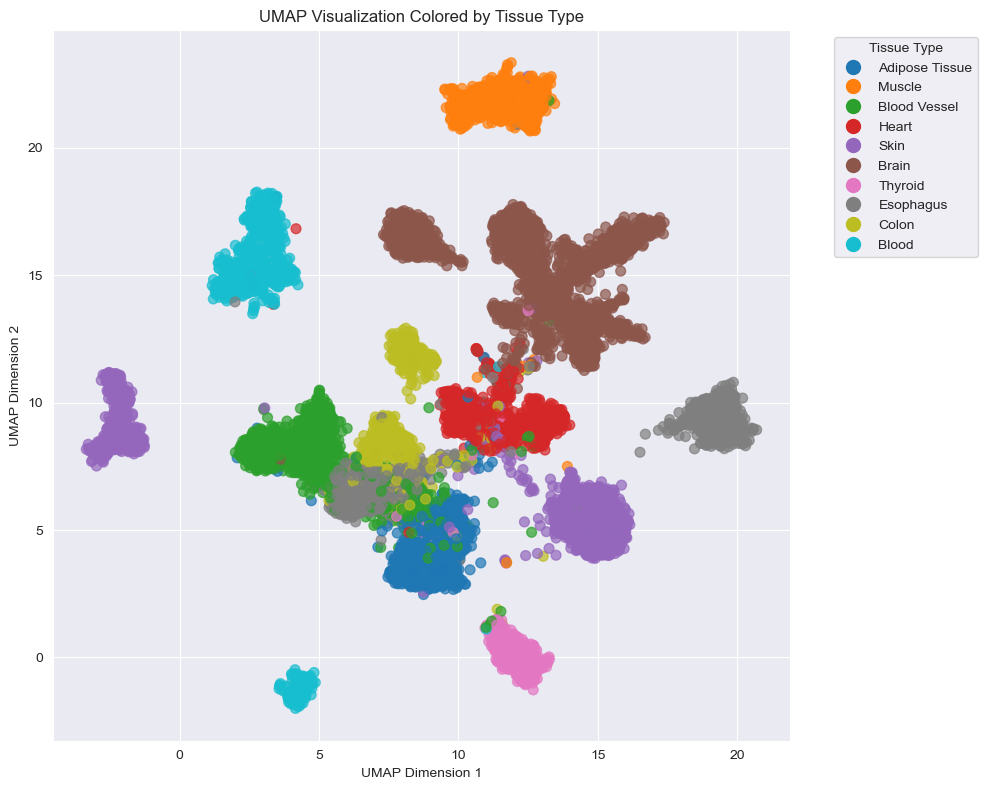

In [77]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=4, min_dist=0.5, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_scaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_scaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


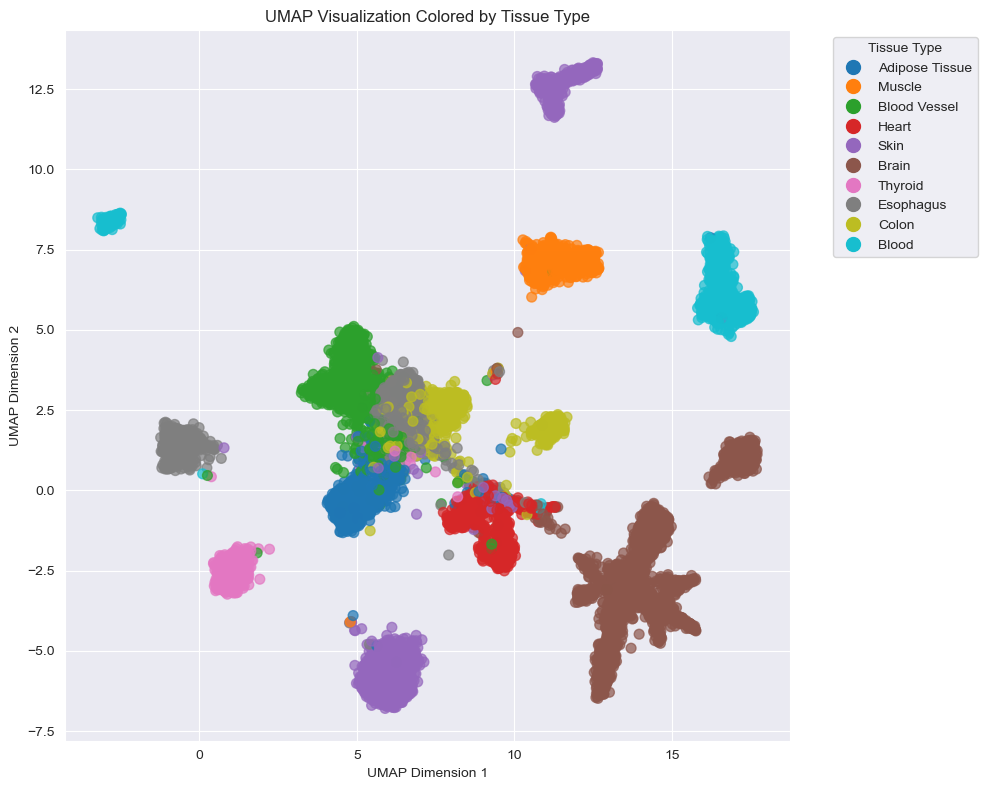

In [78]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=7, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_scaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_scaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


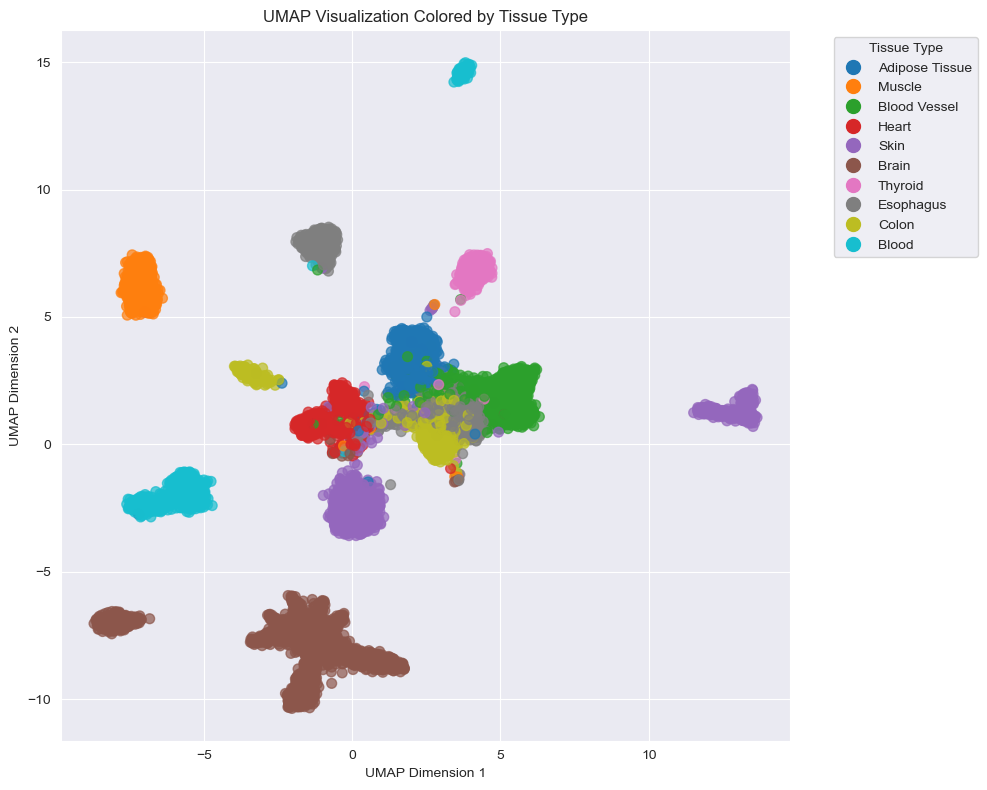

In [79]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_scaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_scaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


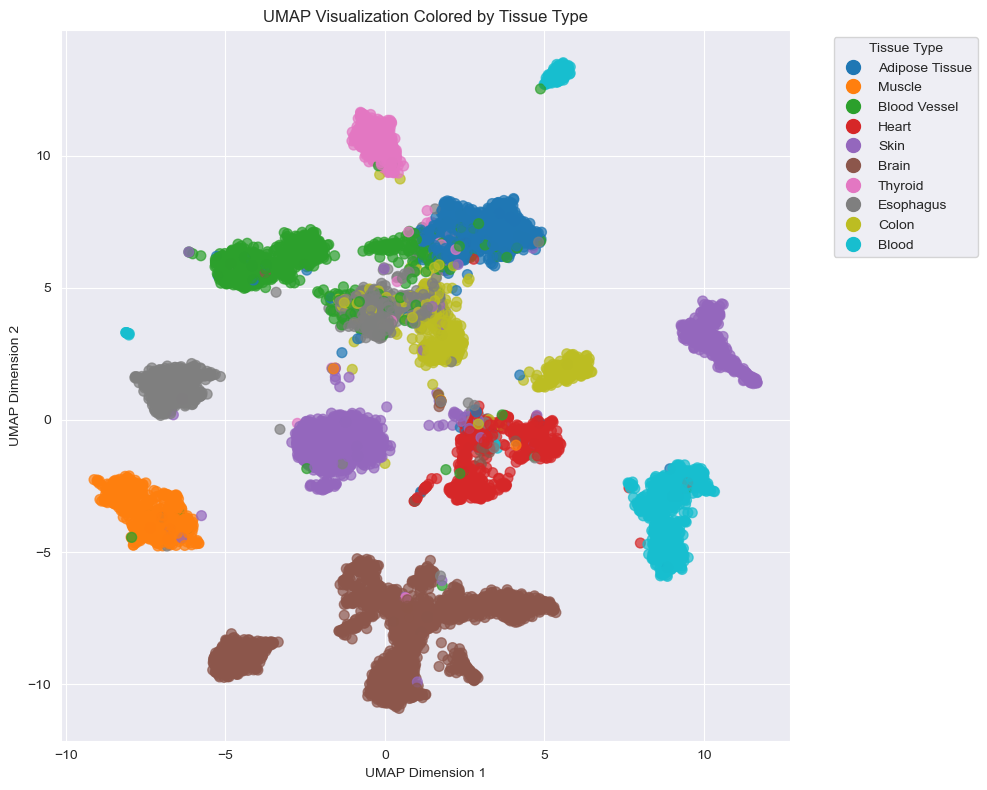

In [80]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=3, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_scaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_scaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


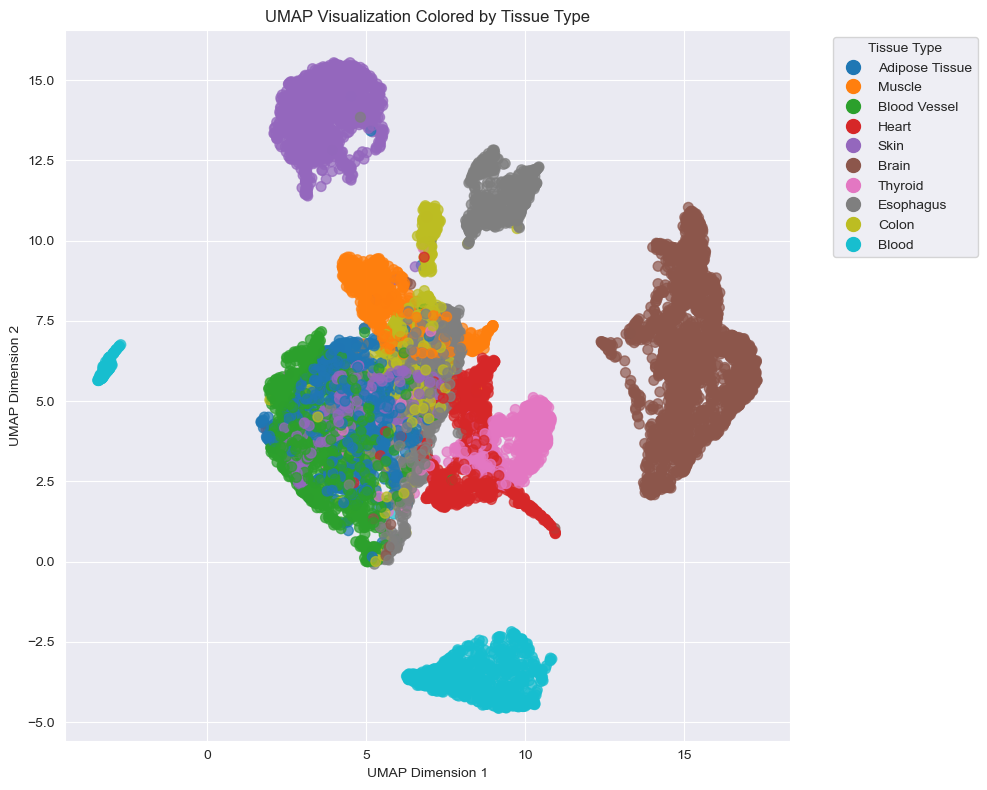

In [81]:
# Step 1: Apply UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=7, min_dist=0.3, random_state=42)
reduced_umap = umap_model.fit_transform(tpm_unscaled)

# Step 2: Create a Default Colormap for Tissue Types
tissue_labels = tpm_unscaled.index
unique_tissues = tissue_labels.unique()
palette = plt.cm.tab20  # Use a colormap with many colors (tab20 has 20 distinct colors)
colors = {tissue: palette(i / len(unique_tissues)) for i, tissue in enumerate(unique_tissues)}

# Step 3: Map Colors to Tissue Labels
point_colors = [colors[tissue] for tissue in tissue_labels]

# Step 4: Plot UMAP with Default Colormap
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_umap[:, 0], reduced_umap[:, 1],
    c=point_colors, alpha=0.7, s=50
)

# Add title, labels, and legend
plt.title("UMAP Visualization Colored by Tissue Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add a legend for tissue types
handles = [
    plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=tissue)
    for tissue, color in colors.items()
]
plt.legend(handles=handles, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### MDS of scaled data

In [82]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

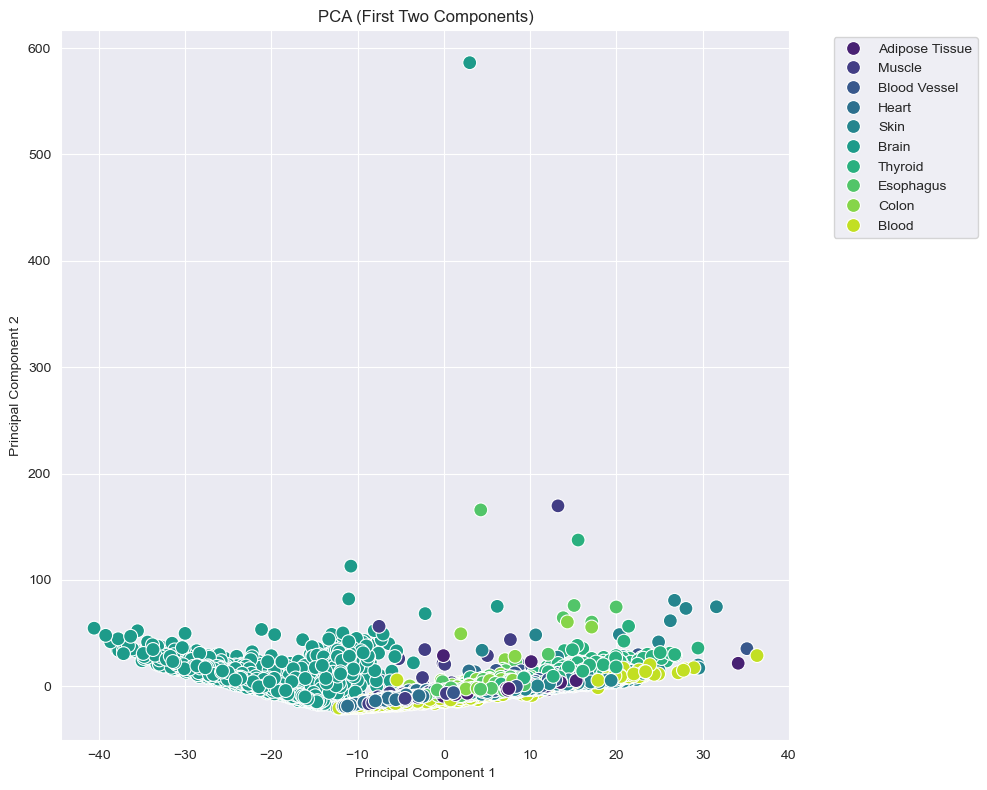

In [83]:
# Step 1: Apply PCA to reduce to 50 feature dimensions
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tpm_scaled)

# Step 2: Convert reduced_data to a DataFrame with proper index
pca_df = pd.DataFrame(reduced_data,
                      columns=[f'PC{i+1}' for i in range(50)],
                      index=tpm_scaled.index)  # Use the original index here

# Step 3: Plot the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue=tpm_scaled.index,  # Replace this with tissue types or your grouping variable
    data=pca_df, palette='viridis', s=100
)
plt.title('PCA (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [84]:
print("Shape of tpm_scaled:", tpm_scaled.shape)
print("Shape of reduced_data:", reduced_data.shape)

Shape of tpm_scaled: (12462, 5000)
Shape of reduced_data: (12462, 50)


In [85]:
distance_matrix = pairwise_distances(reduced_data, metric='euclidean')

In [86]:
print(distance_matrix)

[[ 0.         50.70129573 41.79552078 ... 47.15459648 53.55747758
  43.64453379]
 [50.70129573  0.         36.41542971 ... 31.58578262 13.23185532
  34.13036493]
 [41.79552078 36.41542971  0.         ... 24.57995327 40.71217423
  36.61488161]
 ...
 [47.15459648 31.58578262 24.57995327 ...  0.         29.12203783
  27.59281125]
 [53.55747758 13.23185532 40.71217423 ... 29.12203783  0.
  30.74019851]
 [43.64453379 34.13036493 36.61488161 ... 27.59281125 30.74019851
   0.        ]]


In [87]:
# Apply MDS for 2D reduction
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, max_iter=50, eps=1e-2, n_jobs=-1)
mds_components = mds.fit_transform(distance_matrix)

In [88]:
mds_df = pd.DataFrame(mds_components, columns=['MDS1', 'MDS2'], index=tpm_scaled.index)

In [89]:
display(mds_df)

MDS1       MDS2
Tissue                              
Adipose Tissue  30.472264  33.838709
Muscle         -11.115932  12.344172
Blood Vessel    27.056965 -15.606162
Blood Vessel     1.414411   2.479001
Heart           -6.222853  -1.500010
...                   ...        ...
Thyroid        -23.878372  16.505021
Esophagus        2.451691   8.554148
Blood Vessel     8.881914  11.330339
Muscle          -5.494243  -9.255633
Adipose Tissue  13.324234  10.060787

[12462 rows x 2 columns]

In [90]:
print(mds_df)

                     MDS1       MDS2
Tissue                              
Adipose Tissue  30.472264  33.838709
Muscle         -11.115932  12.344172
Blood Vessel    27.056965 -15.606162
Blood Vessel     1.414411   2.479001
Heart           -6.222853  -1.500010
...                   ...        ...
Thyroid        -23.878372  16.505021
Esophagus        2.451691   8.554148
Blood Vessel     8.881914  11.330339
Muscle          -5.494243  -9.255633
Adipose Tissue  13.324234  10.060787

[12462 rows x 2 columns]


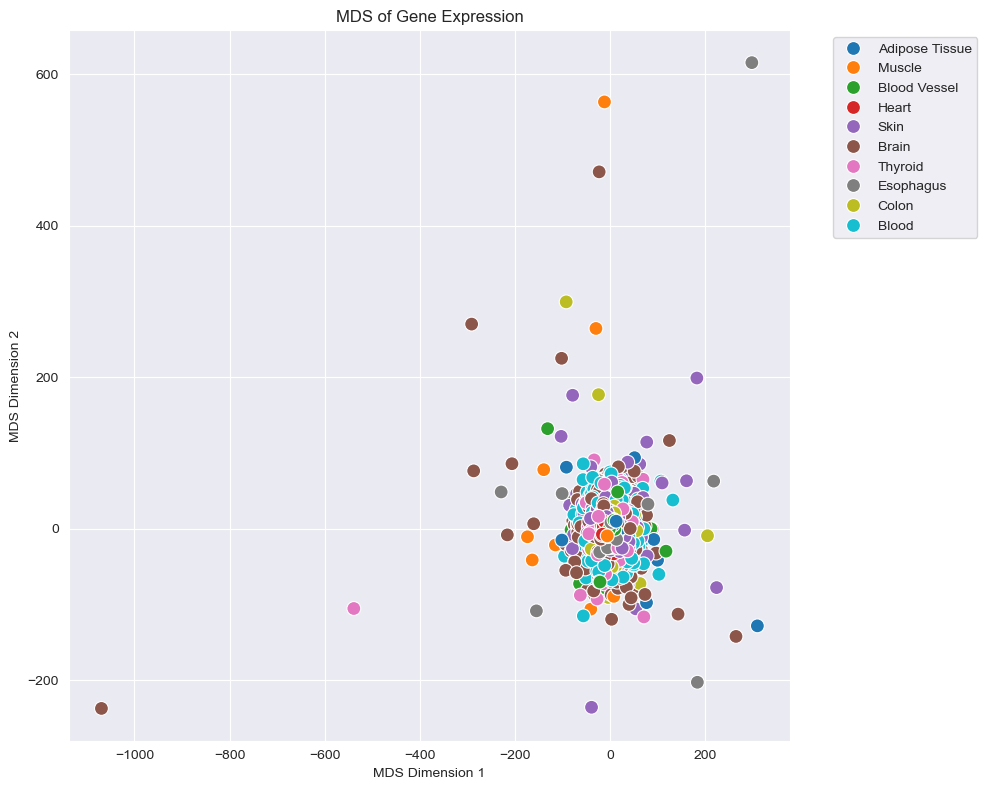

In [91]:
# Plot the MDS result
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='MDS1', y='MDS2', hue='Tissue',
    data=mds_df, palette='tab10', s=100,
)
plt.title('MDS of Gene Expression')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [92]:
from scipy.spatial import ConvexHull

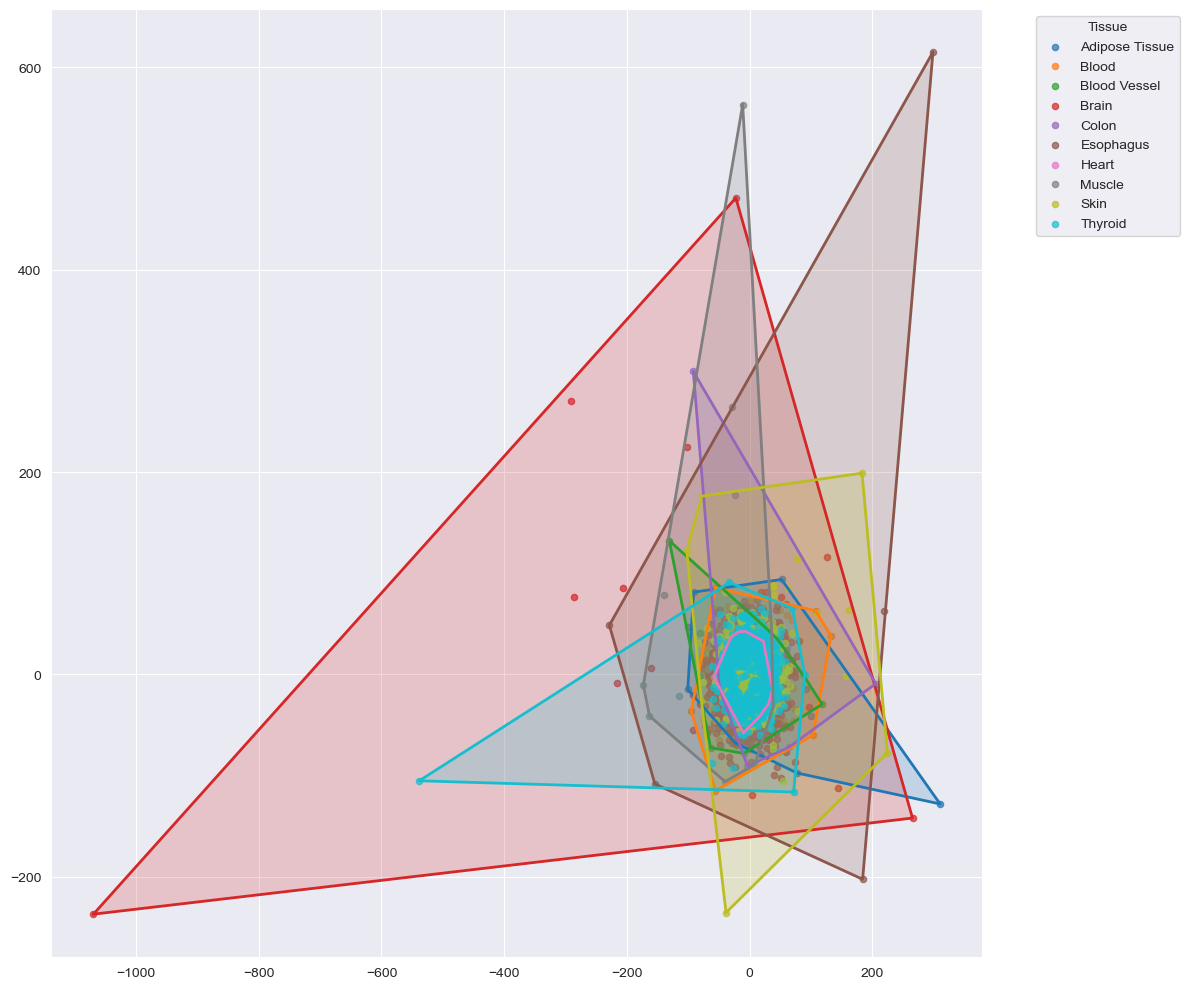

In [93]:
plt.figure(figsize=(12, 10))

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df.index.nunique())

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df.groupby('Tissue')):
    # Scatter plot for the tissue group
    plt.scatter(group['MDS1'], group['MDS2'], color=palette[i], label=tissue, s=20, alpha=0.7)

    # Compute the convex hull
    if len(group) >= 3:  # ConvexHull requires at least 3 points
        points = group[['MDS1', 'MDS2']].values
        hull = ConvexHull(points)

        # Extract the hull vertices and add to plot
        hull_points = points[hull.vertices]
        hull_points = np.append(hull_points, [hull_points[0]], axis=0)  # Close the loop
        plt.plot(hull_points[:, 0], hull_points[:, 1], color=palette[i], linewidth=2)
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.2)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Tissue")

# Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

### 3 component MSDS of scaled data

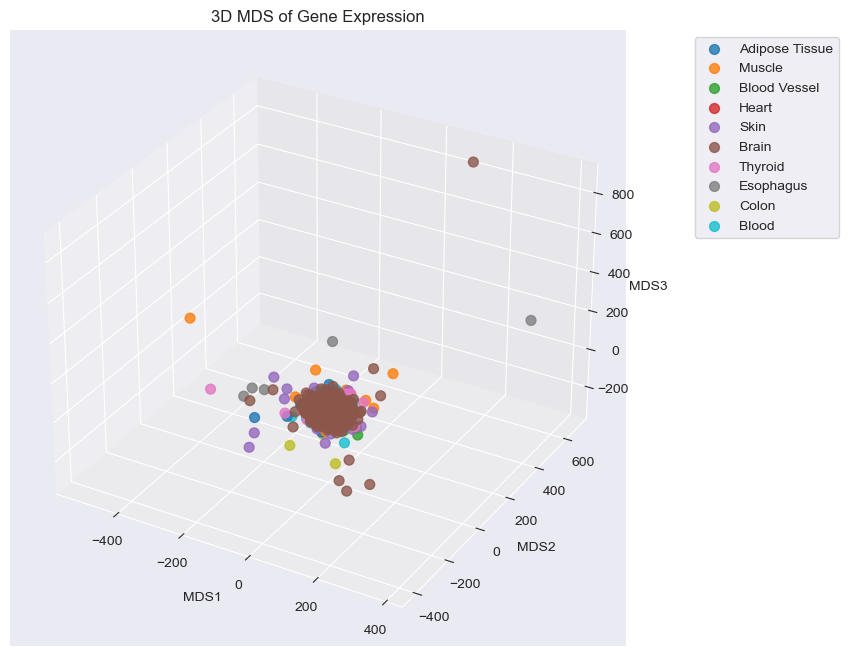

In [94]:
# Apply MDS to get 3 components
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, max_iter=50, eps=1e-2, n_jobs=-1)
mds_3d = mds.fit_transform(distance_matrix)

# Create DataFrame
mds_df_3d = pd.DataFrame(mds_3d, columns=['MDS1', 'MDS2', 'MDS3'], index=tpm_scaled.index)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for tissue in mds_df_3d.index.unique():
    subset = mds_df_3d[mds_df_3d.index == tissue]
    ax.scatter(subset['MDS1'], subset['MDS2'], subset['MDS3'], label=tissue, s=50, alpha=0.8)

ax.set_title('3D MDS of Gene Expression')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()


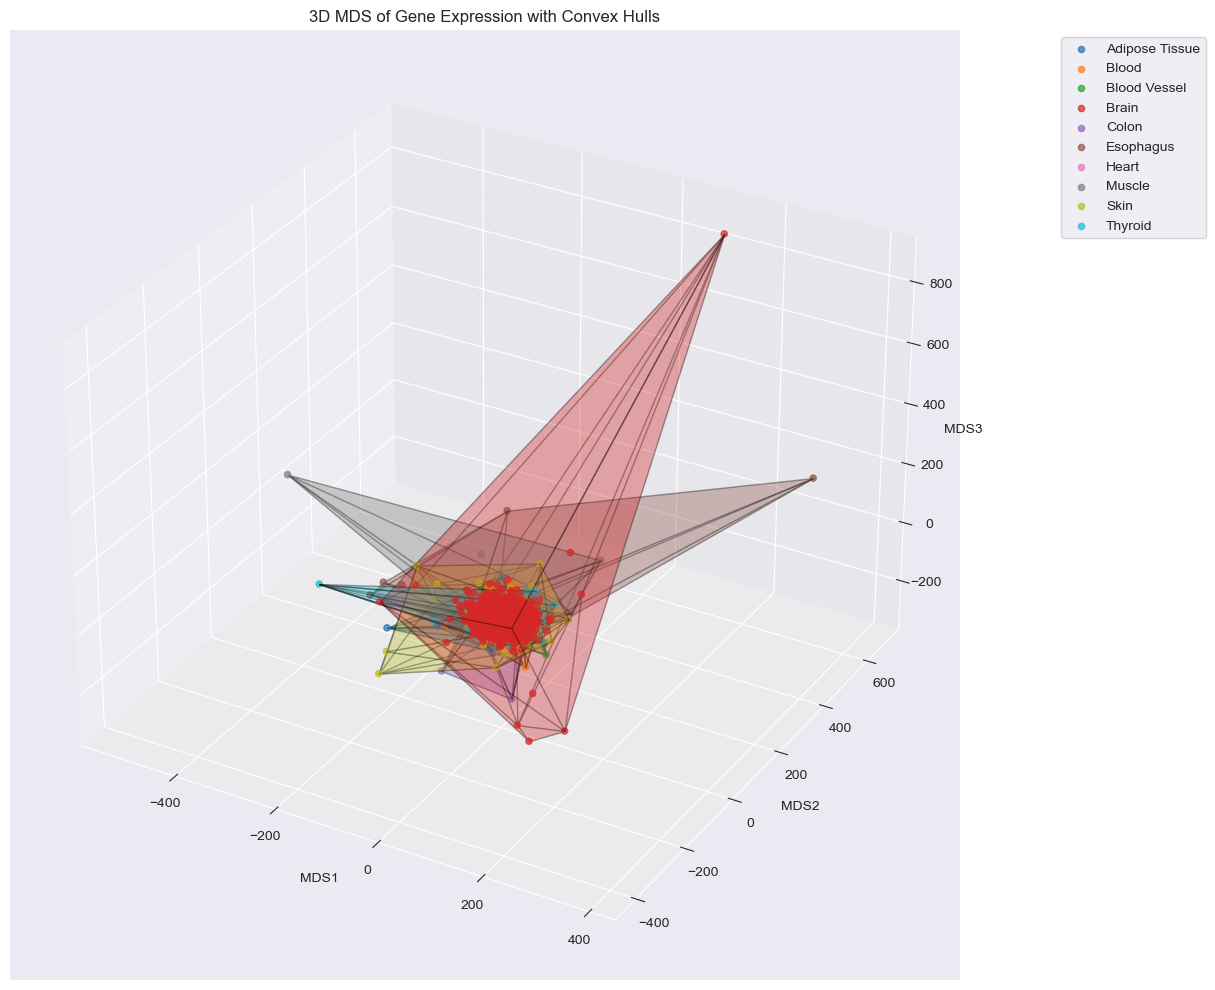

In [95]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot in 3D with Convex Hulls
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df_3d.index.nunique())

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df_3d.groupby(mds_df_3d.index)):
    # Scatter plot for the tissue group
    ax.scatter(group['MDS1'], group['MDS2'], group['MDS3'],
               color=palette[i], label=tissue, s=20, alpha=0.7)

    # Compute the convex hull
    if len(group) >= 4:  # ConvexHull requires at least 4 points in 3D
        points = group[['MDS1', 'MDS2', 'MDS3']].values
        hull = ConvexHull(points)

        # Extract the hull faces and add to the plot
        for simplex in hull.simplices:
            hull_points = points[simplex]
            ax.add_collection3d(Poly3DCollection([hull_points], color=palette[i], alpha=0.2, edgecolor='k'))


# Add labels and title
ax.set_title('3D MDS of Gene Expression with Convex Hulls')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

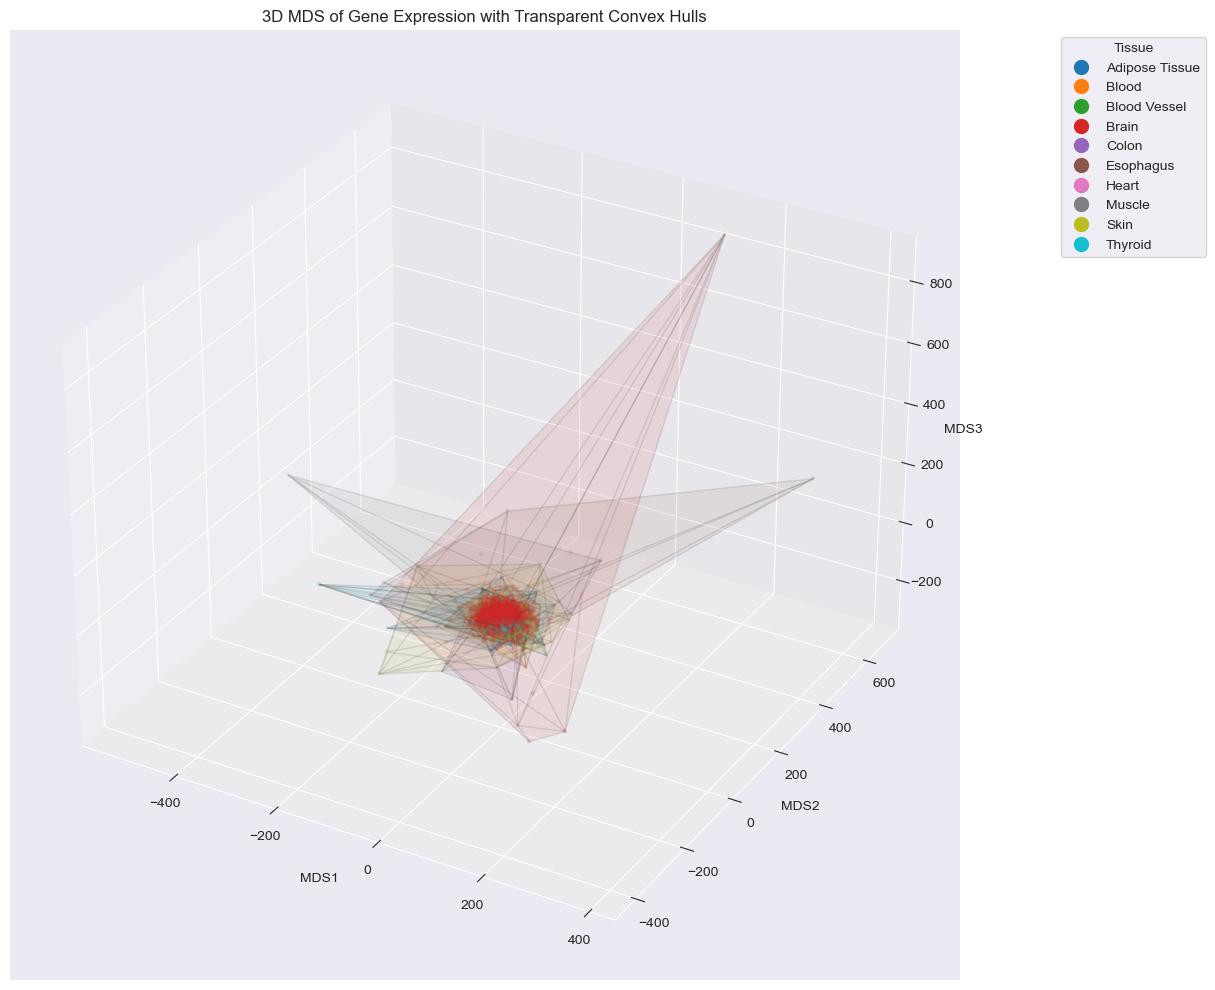

In [96]:
# Plot in 3D with Convex Hulls
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df_3d.index.nunique())

# Dictionary to store color without alpha for legend
legend_colors = {}

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df_3d.groupby(mds_df_3d.index)):
    # Scatter plot for the tissue group (transparent points)
    color_with_alpha = (*palette[i], 0.2)  # Add transparency to RGB color
    ax.scatter(group['MDS1'], group['MDS2'], group['MDS3'],
               color=color_with_alpha, label=tissue, s=5)

    # Store opaque color for legend
    legend_colors[tissue] = palette[i]

    # Compute the convex hull
    if len(group) >= 4:  # ConvexHull requires at least 4 points in 3D
        points = group[['MDS1', 'MDS2', 'MDS3']].values
        hull = ConvexHull(points)

        # Extract the hull faces and add to the plot (transparent hulls)
        for simplex in hull.simplices:
            hull_points = points[simplex]
            ax.add_collection3d(Poly3DCollection([hull_points],
                                                 color=color_with_alpha, alpha=0.05, edgecolor='k'))

# Add labels and title
ax.set_title('3D MDS of Gene Expression with Transparent Convex Hulls')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')

# Create a custom legend with opaque colors
legend_patches = [plt.Line2D([0], [0], marker='o', color=legend_colors[tissue],
                             markersize=10, linestyle='None')
                  for tissue in legend_colors]
ax.legend(legend_patches, legend_colors.keys(), bbox_to_anchor=(1.1, 1), loc='upper left', title="Tissue")

plt.tight_layout()
plt.show()



### MDS of Unscaled Data

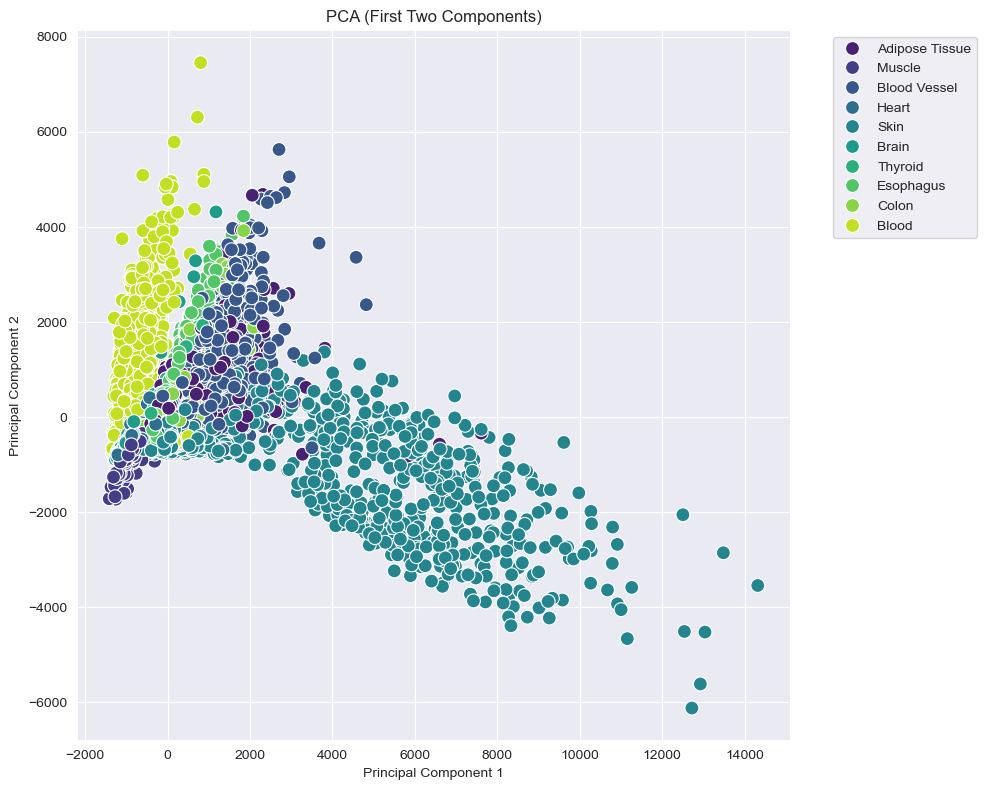

In [97]:
# Step 1: Apply PCA to reduce to 50 dimensions
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tpm_unscaled)

# Step 2: Convert reduced_data to a DataFrame with proper index
pca_df = pd.DataFrame(reduced_data,
                      columns=[f'PC{i+1}' for i in range(50)],
                      index=tpm_unscaled.index)  # Use the original index here

# Step 3: Plot the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue=tpm_unscaled.index,  # Replace this with tissue types or your grouping variable
    data=pca_df, palette='viridis', s=100
)
plt.title('PCA (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [98]:
print("Shape of tpm_scaled:", tpm_unscaled.shape)
print("Shape of reduced_data:", reduced_data.shape)

Shape of tpm_scaled: (12462, 5000)
Shape of reduced_data: (12462, 50)


In [99]:
distance_matrix = pairwise_distances(reduced_data, metric='euclidean')

In [100]:
print(distance_matrix)

[[   0.         3352.82860928 1668.79001813 ... 1441.88555278
  3061.46009346 1861.17450912]
 [3352.82860928    0.         3238.85648203 ... 2504.12545887
  1605.1516295  2183.05823486]
 [1668.79001813 3238.85648203    0.         ... 1325.80663516
  3139.36198542 2056.72957545]
 ...
 [1441.88555278 2504.12545887 1325.80663516 ...    0.
  2033.96067346  957.15055539]
 [3061.46009346 1605.1516295  3139.36198542 ... 2033.96067346
     0.         1471.25356233]
 [1861.17450912 2183.05823486 2056.72957545 ...  957.15055539
  1471.25356233    0.        ]]


In [101]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, max_iter=50, eps=1e-2, n_jobs=-1)
mds_components = mds.fit_transform(distance_matrix)

In [102]:
mds_df = pd.DataFrame(mds_components, columns=['MDS1', 'MDS2'], index=tpm_scaled.index)

In [103]:
display(mds_df)

MDS1         MDS2
Tissue                                  
Adipose Tissue  2099.128621   650.363135
Muscle         -1359.175358  1232.885779
Blood Vessel    2180.153657   -84.403579
Blood Vessel   -1257.186201 -3048.241187
Heart            -55.463623   669.930411
...                     ...          ...
Thyroid         -204.814228    53.143579
Esophagus        979.452250   536.904017
Blood Vessel    1013.341022   284.372712
Muscle          -801.526978  -519.734721
Adipose Tissue   372.320232   368.867439

[12462 rows x 2 columns]

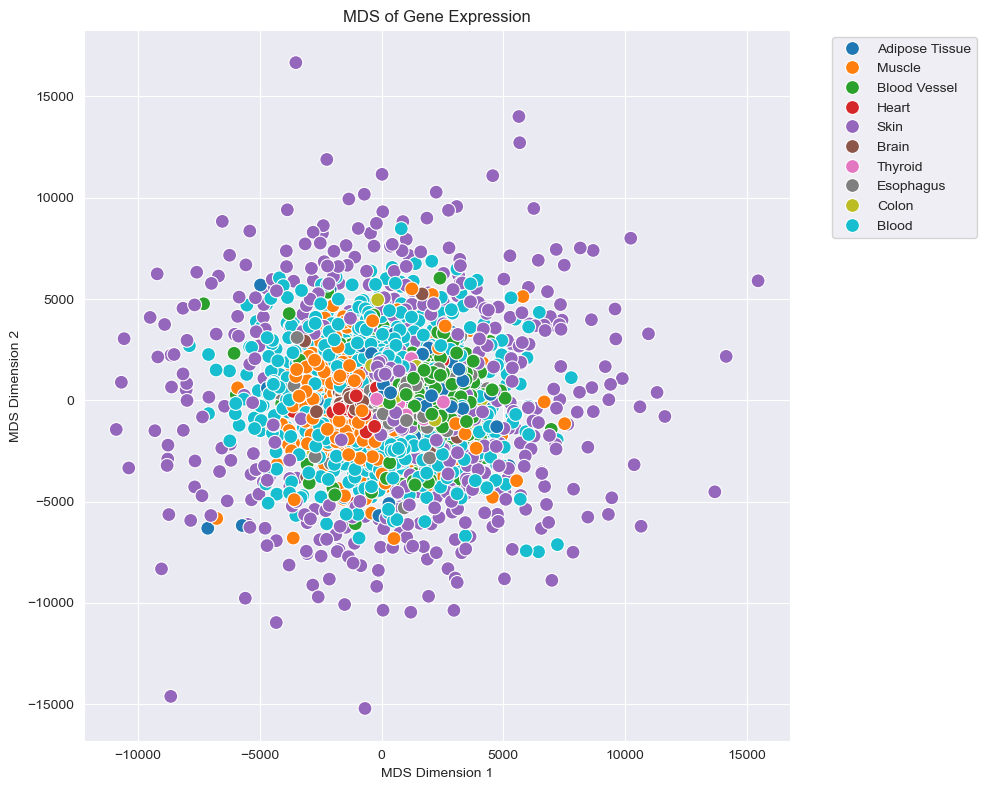

In [104]:
# Plot the MDS result
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='MDS1', y='MDS2', hue='Tissue',
    data=mds_df, palette='tab10', s=100,
)
plt.title('MDS of Gene Expression')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

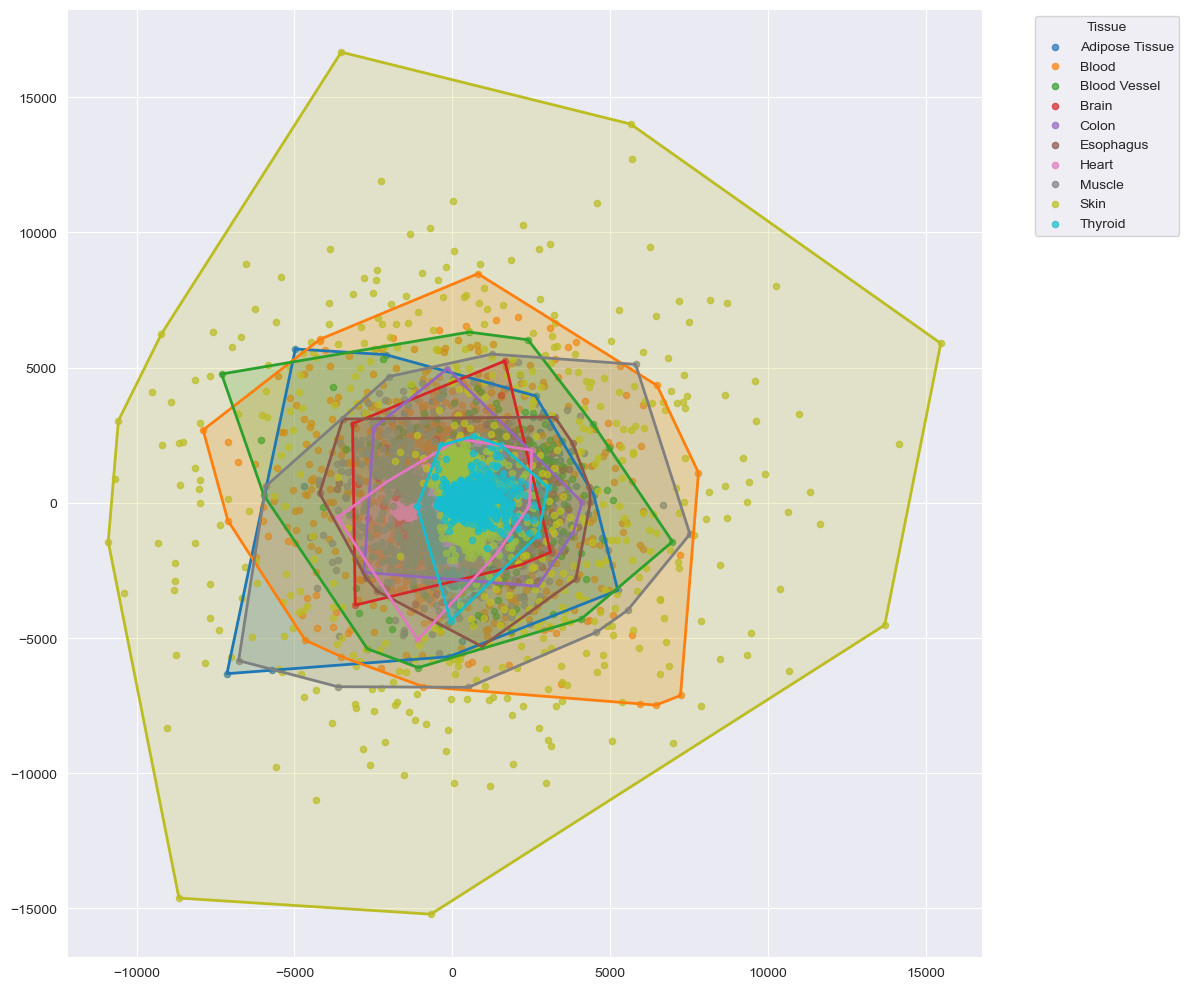

In [105]:
plt.figure(figsize=(12, 10))

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df.index.nunique())

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df.groupby('Tissue')):
    # Scatter plot for the tissue group
    plt.scatter(group['MDS1'], group['MDS2'], color=palette[i], label=tissue, s=20, alpha=0.7)

    # Compute the convex hull
    if len(group) >= 3:  # ConvexHull requires at least 3 points
        points = group[['MDS1', 'MDS2']].values
        hull = ConvexHull(points)

        # Extract the hull vertices and add to plot
        hull_points = points[hull.vertices]
        hull_points = np.append(hull_points, [hull_points[0]], axis=0)  # Close the loop
        plt.plot(hull_points[:, 0], hull_points[:, 1], color=palette[i], linewidth=2)
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=palette[i], alpha=0.2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Tissue")

# Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

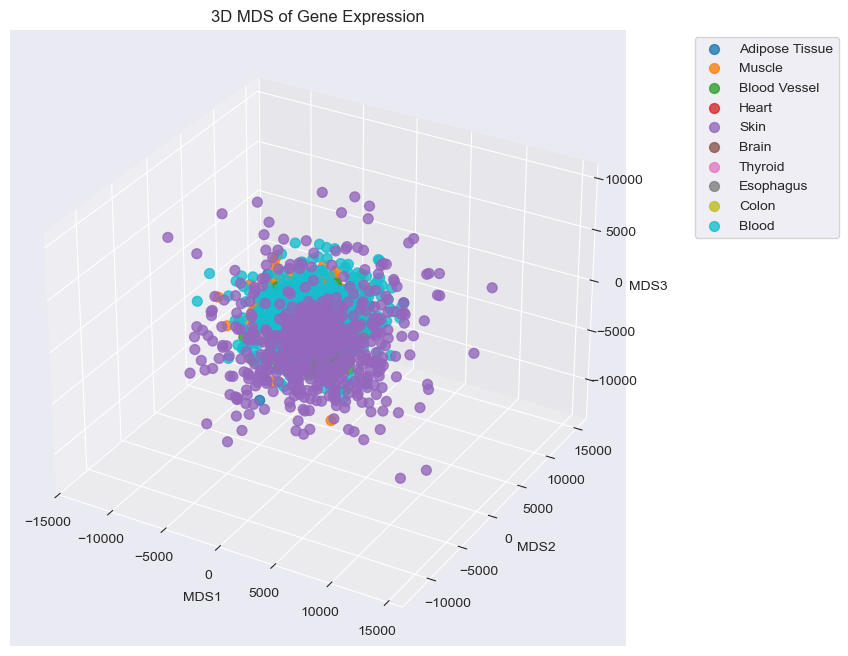

In [106]:
# Apply MDS to get 3 components
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, max_iter=50, eps=1e-2, n_jobs=-1)
mds_3d = mds.fit_transform(distance_matrix)

# Create DataFrame
mds_df_3d = pd.DataFrame(mds_3d, columns=['MDS1', 'MDS2', 'MDS3'], index=tpm_scaled.index)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for tissue in mds_df_3d.index.unique():
    subset = mds_df_3d[mds_df_3d.index == tissue]
    ax.scatter(subset['MDS1'], subset['MDS2'], subset['MDS3'], label=tissue, s=50, alpha=0.8)

ax.set_title('3D MDS of Gene Expression')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

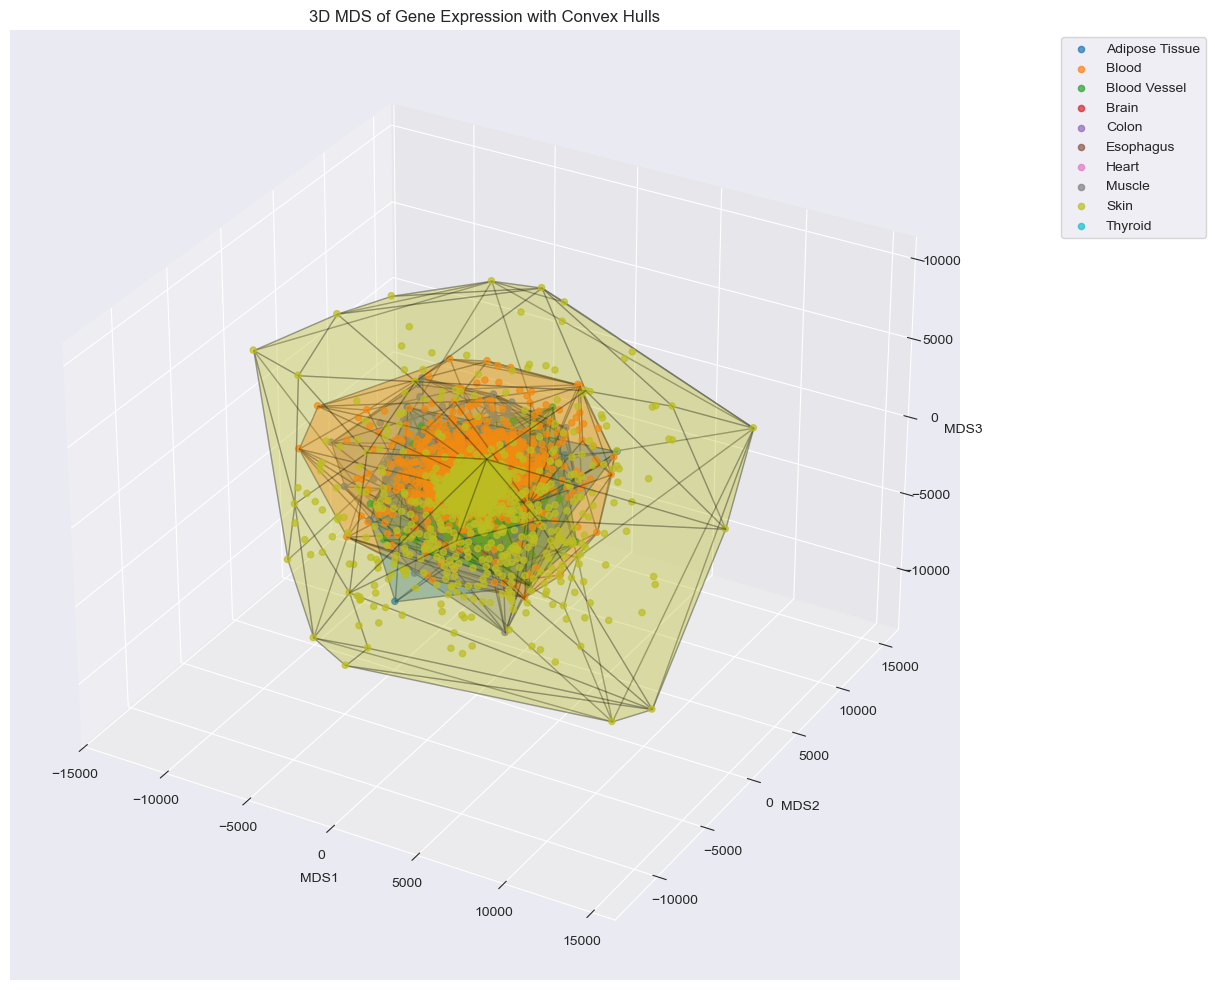

In [107]:
# Plot in 3D with Convex Hulls
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df_3d.index.nunique())

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df_3d.groupby(mds_df_3d.index)):
    # Scatter plot for the tissue group
    ax.scatter(group['MDS1'], group['MDS2'], group['MDS3'],
               color=palette[i], label=tissue, s=20, alpha=0.7)

    # Compute the convex hull
    if len(group) >= 4:  # ConvexHull requires at least 4 points in 3D
        points = group[['MDS1', 'MDS2', 'MDS3']].values
        hull = ConvexHull(points)

        # Extract the hull faces and add to the plot
        for simplex in hull.simplices:
            hull_points = points[simplex]
            ax.add_collection3d(Poly3DCollection([hull_points], color=palette[i], alpha=0.2, edgecolor='k'))


# Add labels and title
ax.set_title('3D MDS of Gene Expression with Convex Hulls')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

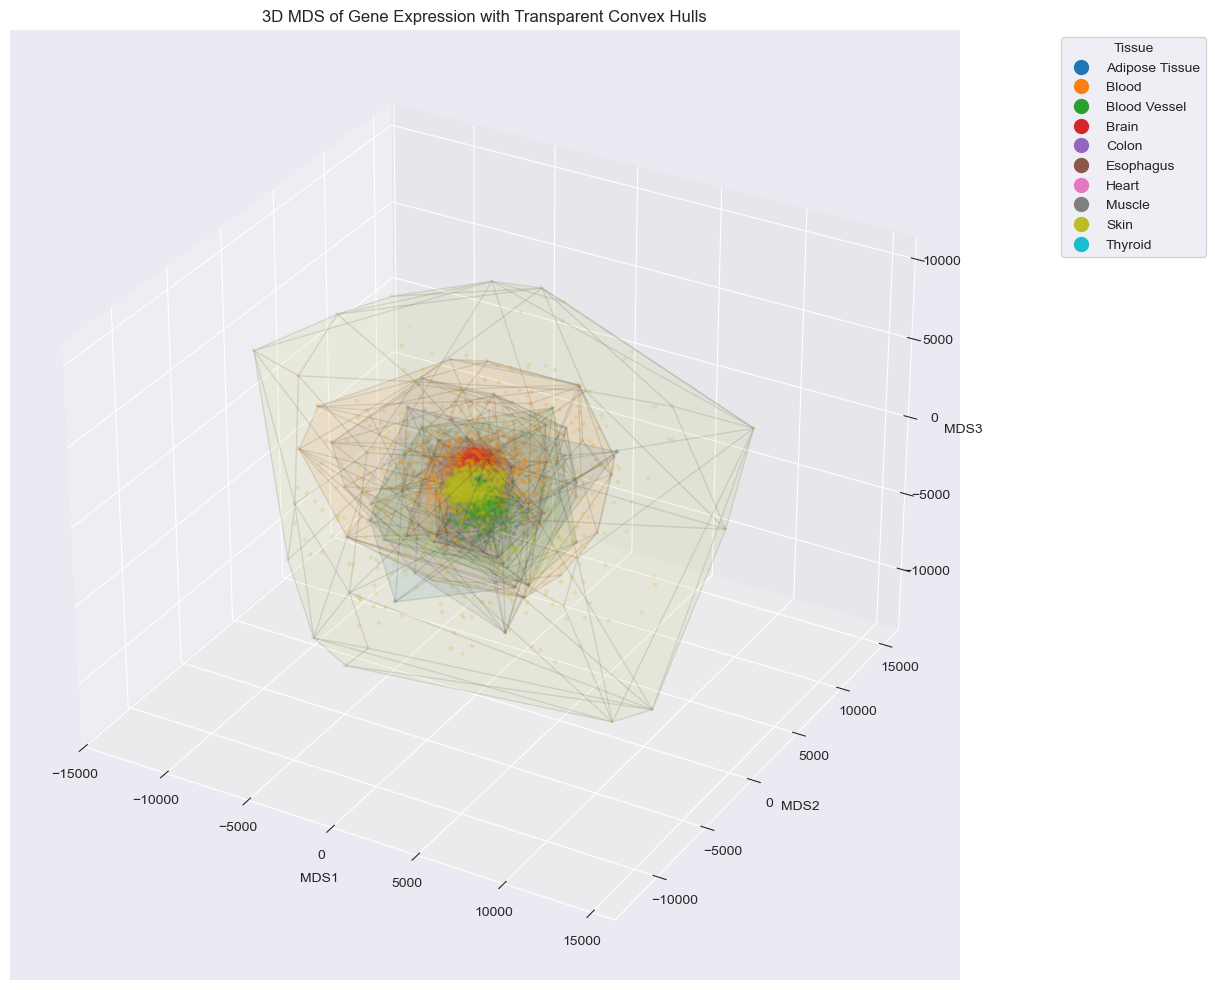

In [108]:
# Plot in 3D with Convex Hulls
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color palette
palette = sns.color_palette('tab10', n_colors=mds_df_3d.index.nunique())

# Dictionary to store color without alpha for legend
legend_colors = {}

# Plot each tissue group with convex hull
for i, (tissue, group) in enumerate(mds_df_3d.groupby(mds_df_3d.index)):
    # Scatter plot for the tissue group (transparent points)
    color_with_alpha = (*palette[i], 0.2)  # Add transparency to RGB color
    ax.scatter(group['MDS1'], group['MDS2'], group['MDS3'],
               color=color_with_alpha, label=tissue, s=5)

    # Store opaque color for legend
    legend_colors[tissue] = palette[i]

    # Compute the convex hull
    if len(group) >= 4:  # ConvexHull requires at least 4 points in 3D
        points = group[['MDS1', 'MDS2', 'MDS3']].values
        hull = ConvexHull(points)

        # Extract the hull faces and add to the plot (transparent hulls)
        for simplex in hull.simplices:
            hull_points = points[simplex]
            ax.add_collection3d(Poly3DCollection([hull_points],
                                                 color=color_with_alpha, alpha=0.05, edgecolor='k'))

# Add labels and title
ax.set_title('3D MDS of Gene Expression with Transparent Convex Hulls')
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')

# Create a custom legend with opaque colors
legend_patches = [plt.Line2D([0], [0], marker='o', color=legend_colors[tissue],
                             markersize=10, linestyle='None')
                  for tissue in legend_colors]
ax.legend(legend_patches, legend_colors.keys(), bbox_to_anchor=(1.1, 1), loc='upper left', title="Tissue")

plt.tight_layout()
plt.show()

### 50d PCA and 3d UMAP with Spectral Clustering Analysis on Scaled Data

In [109]:
from sklearn.cluster import SpectralClustering

In [110]:
pca = PCA(n_components=50, random_state=42)  # Keep 50 components
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: UMAP on PCA-reduced data
umap_model = umap.UMAP(n_components=3, n_neighbors=3, min_dist=0.3, random_state=42)  # UMAP reduces to 3D
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [111]:
# Step 4: Create DataFrame for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels

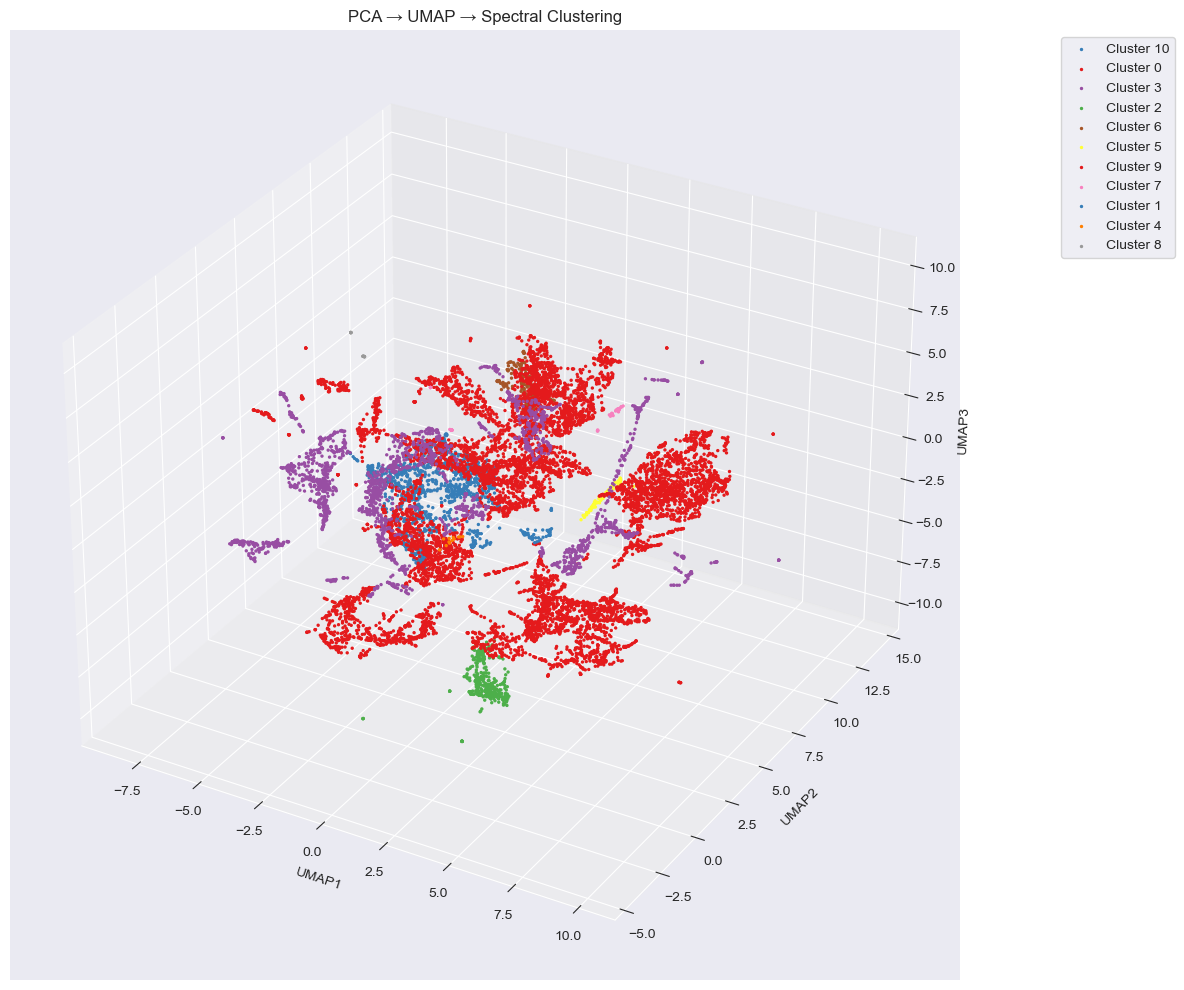

In [112]:
# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [113]:
from sklearn.metrics import silhouette_score

In [114]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: -0.2479


### 500d PCA to 2d UMAP

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


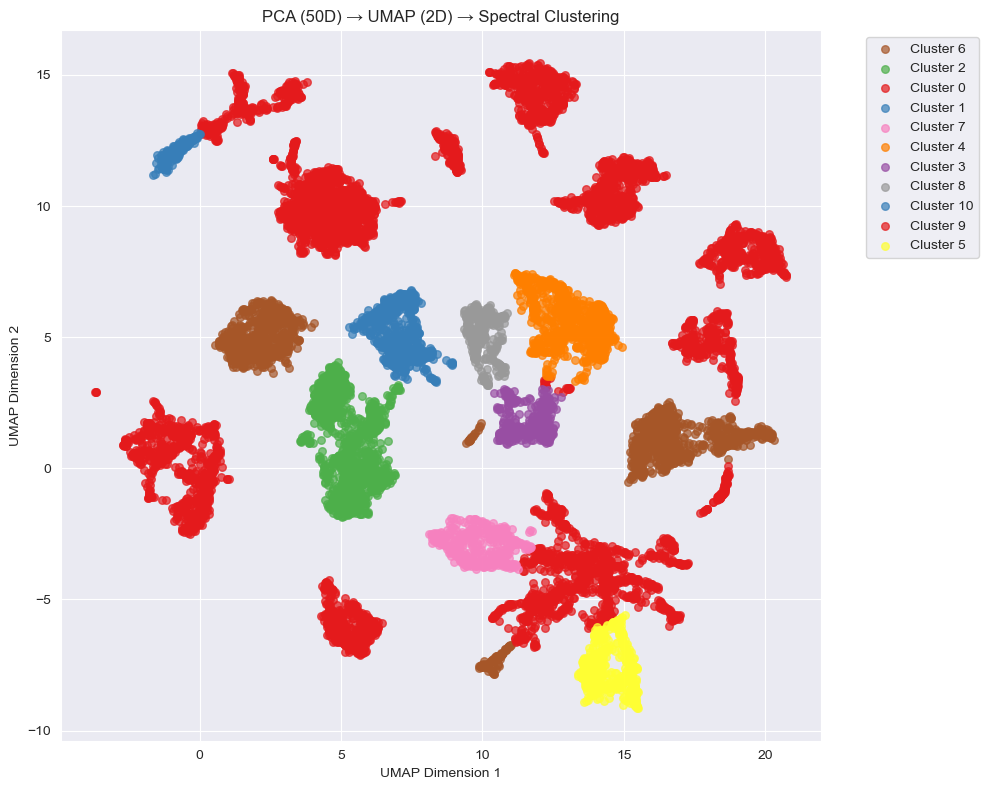

In [118]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=500, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 2D using UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=3, min_dist=0.3, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 4: Plot the 2D UMAP visualization
plt.figure(figsize=(10, 8))

# Define a diverse color palette for the clusters
palette = sns.color_palette('Set1', n_colors=len(umap_df['Cluster'].unique()))

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], color=palette[label],
                label=f'Cluster {label}', s=30, alpha=0.7)  # Adjust size and transparency

# Add labels and title
plt.title('PCA (50D) → UMAP (2D) → Spectral Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [119]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: -0.1171


### 500d PCA and 3d UMAP

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


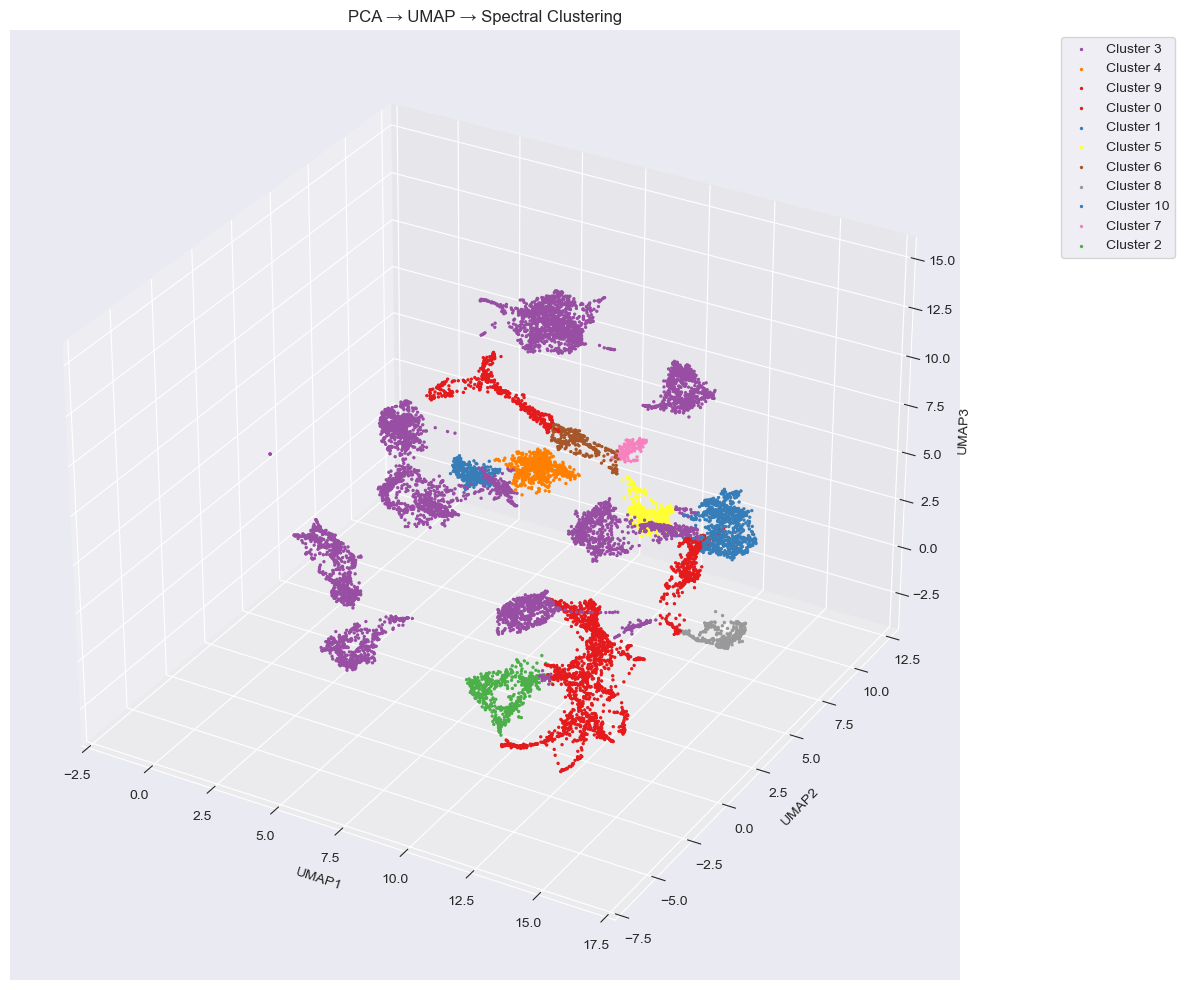

In [120]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=500, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=3, min_dist=0.3, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [121]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: -0.0392


### 5000d PCA to 3d UMAP with 10 clusters instead of 11

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


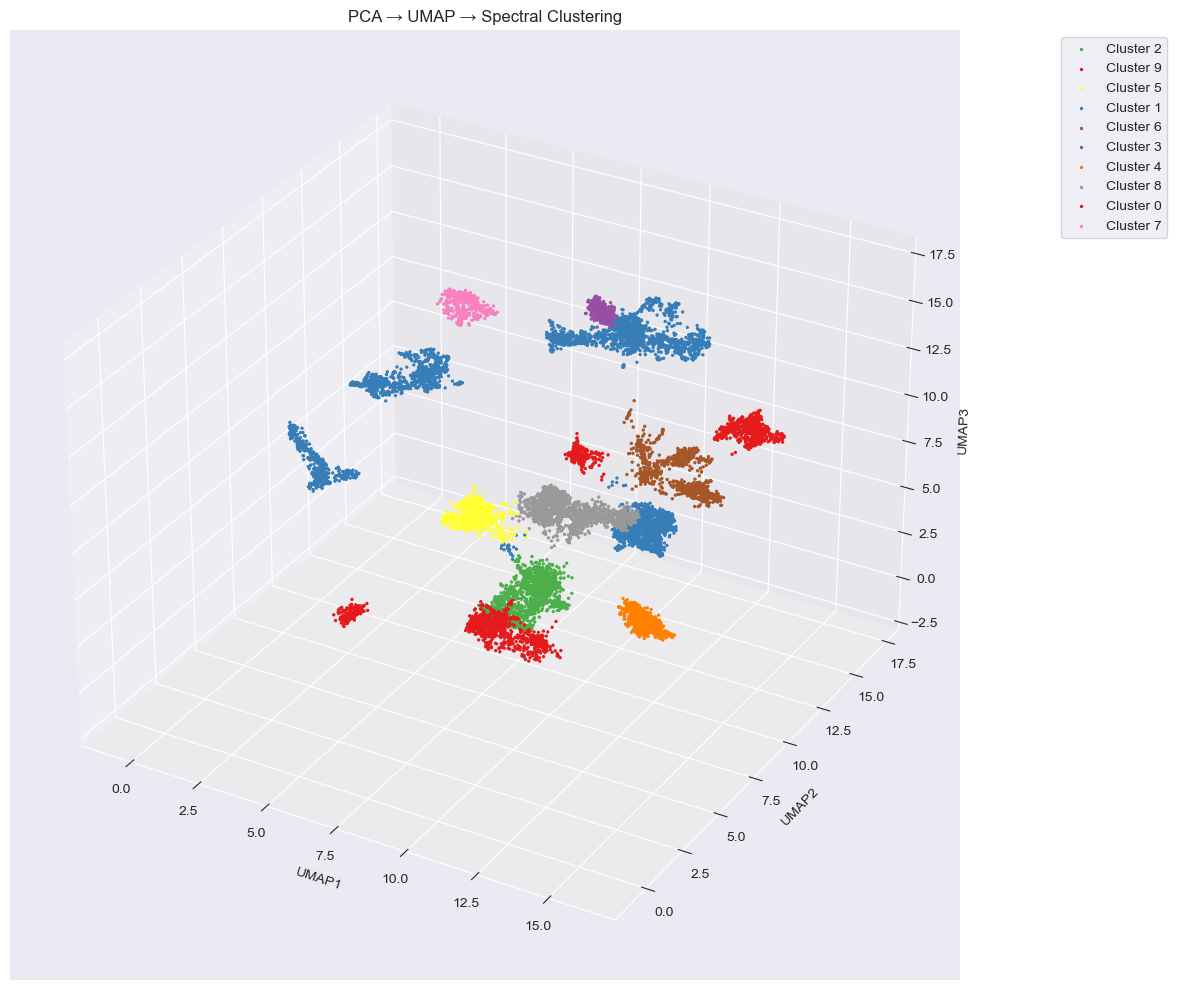

In [125]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=5000, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=3, min_dist=0.3, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [126]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: 0.2340


### Same as above but with 9 clusters

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


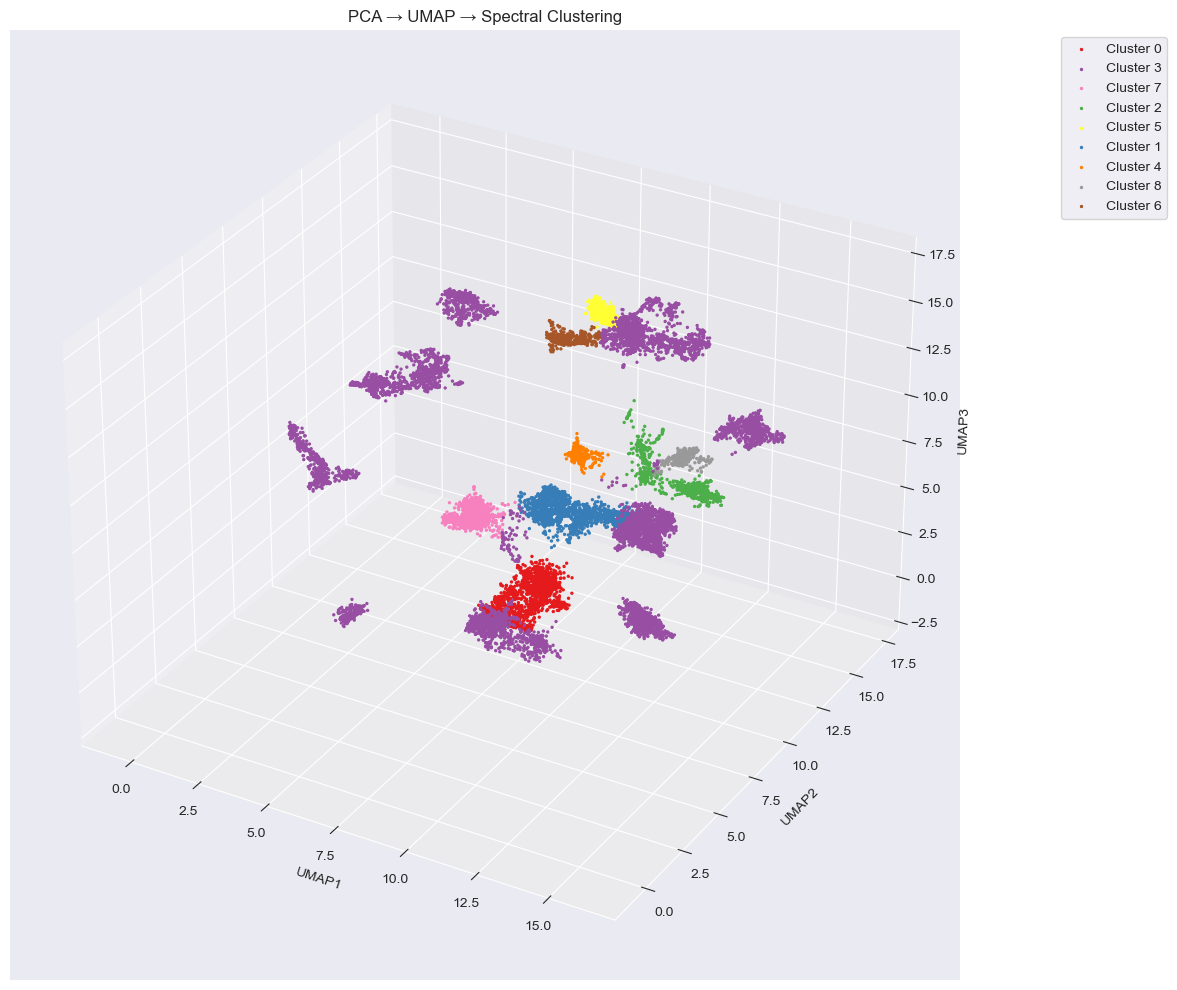

In [128]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=5000, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=3, min_dist=0.3, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=9, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [129]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: 0.0725


### Further tweaking PCA, 3d UMAP, and 10 clusters

#### this seems to be the best method by silhoutte score:

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


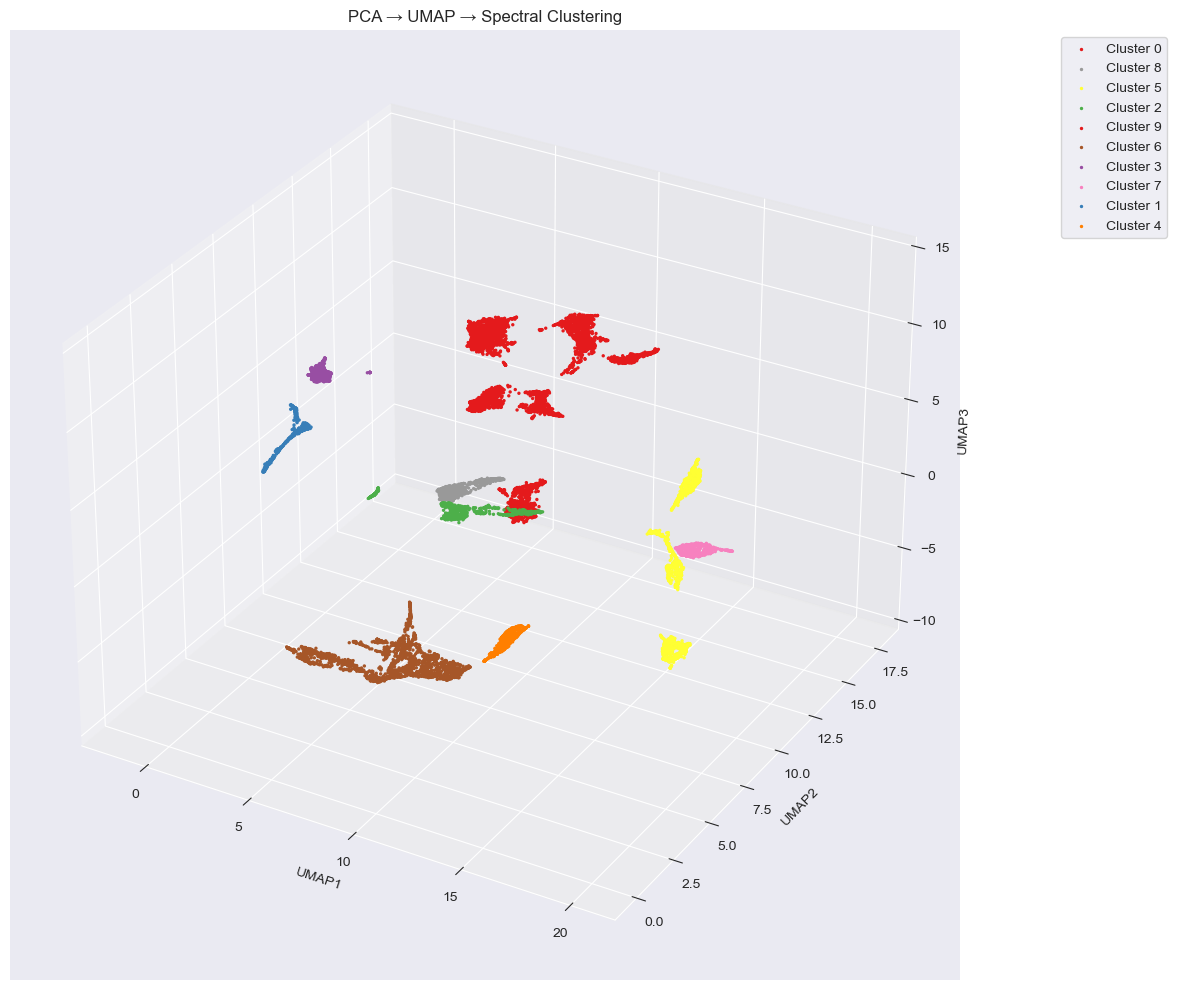

In [136]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=100, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.1, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [137]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: 0.6359


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


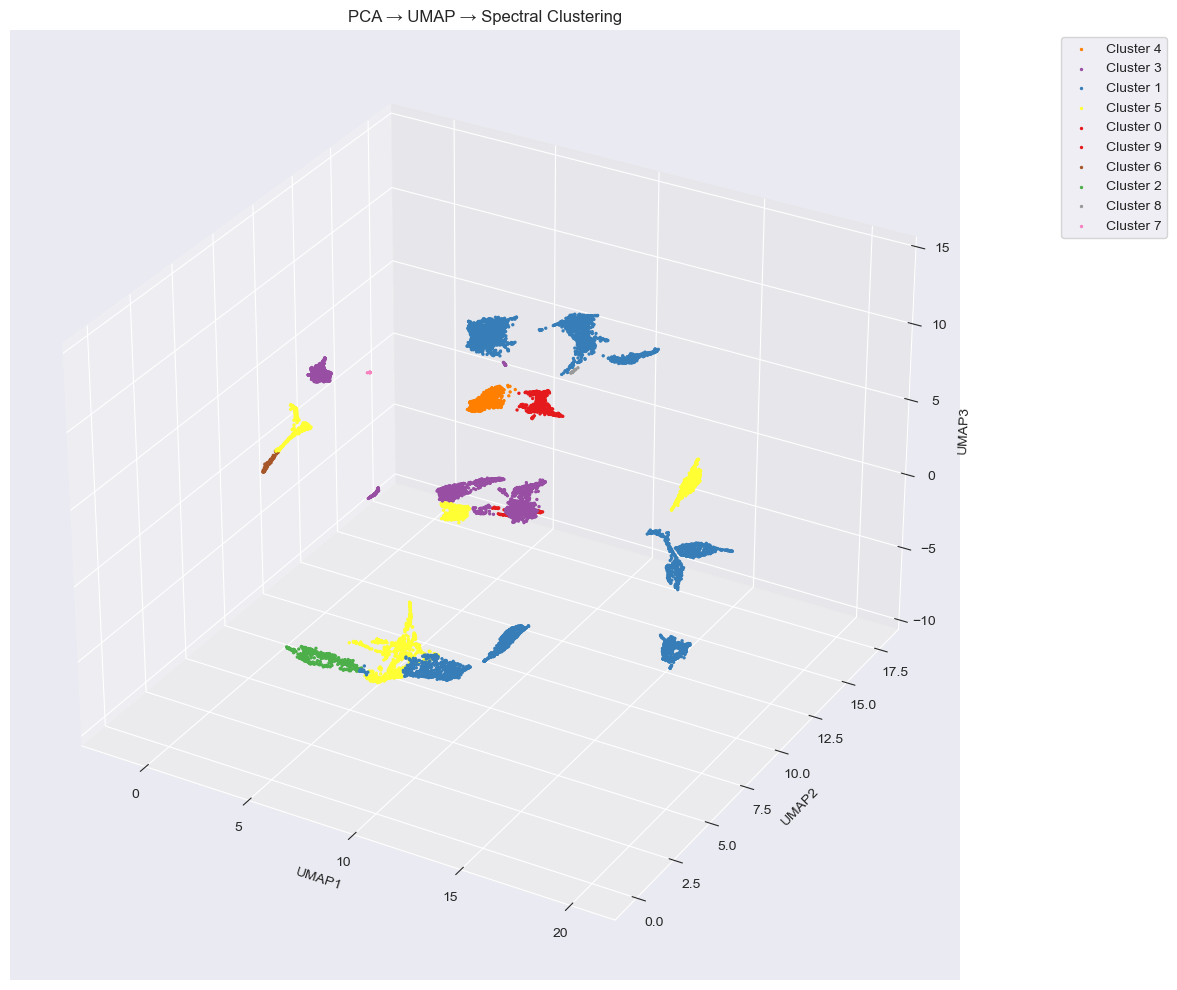

In [138]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=100, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.1, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [139]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: -0.2350


### The scaled PCA data above (with the convex 2d hulls) almost seems to have less than 10 points that don't overlap to predict the variance in the samples between tissues. Testing that theory here.

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


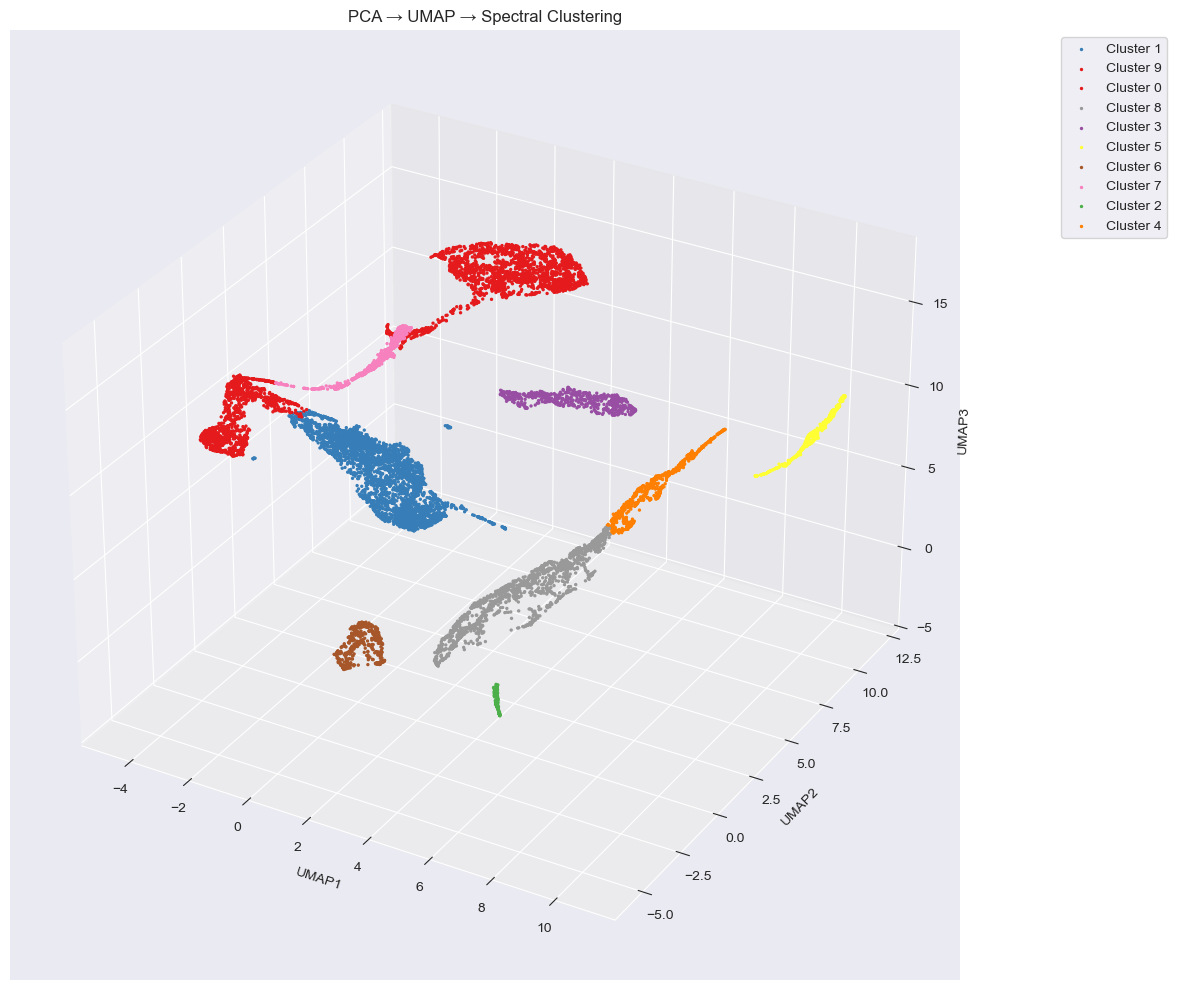

In [140]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=7, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap_model = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.1, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap_df['Cluster'].nunique())

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [141]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: 0.6244


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


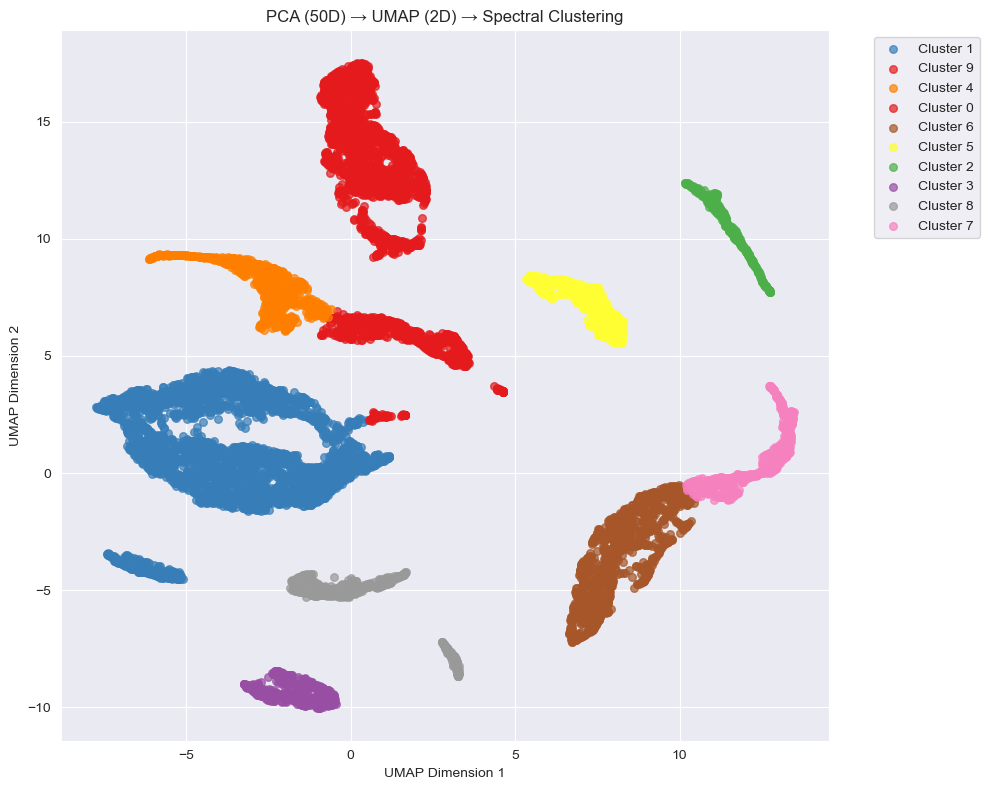

In [147]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=7, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 2D using UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
umap_data = umap_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap_data)

# Step 3: Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 4: Plot the 2D UMAP visualization
plt.figure(figsize=(10, 8))

# Define a diverse color palette for the clusters
palette = sns.color_palette('Set1', n_colors=len(umap_df['Cluster'].unique()))

# Plot each cluster
for label in umap_df['Cluster'].unique():
    subset = umap_df[umap_df['Cluster'] == label]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], color=palette[label],
                label=f'Cluster {label}', s=30, alpha=0.7)  # Adjust size and transparency

# Add labels and title
plt.title('PCA (50D) → UMAP (2D) → Spectral Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [148]:
# Step 1: Compute Silhouette Score
sil_score = silhouette_score(umap_data, cluster_labels, metric='euclidean')

# Step 2: Print the Silhouette Score
print(f"Silhouette Score for Spectral Clustering: {sil_score:.4f}")

Silhouette Score for Spectral Clustering: 0.5178


### Another option may be to use PCA and MDS with Spectral Clustering Analysis on Unscaled Data

In [149]:
display(tpm_scaled)

RP11-3J1.1  TMEM167B  RNA5SP19  RP11-388G3.1  CH17-264B6.4  \
Tissue                                                                       
Adipose Tissue   -0.187192  1.878705 -0.149649     -0.330800     -0.163793   
Muscle           -0.187192 -0.142945 -0.149649     -0.330800     -0.163793   
Blood Vessel     -0.187192  1.376769 -0.149649      2.257657     -0.163793   
Blood Vessel     -0.187192  0.627176 -0.149649     -0.330800     -0.163793   
Heart             1.718123 -0.779966 -0.149649     -0.330800     -0.163793   
...                    ...       ...       ...           ...           ...   
Thyroid          -0.187192 -0.021765 -0.149649     -0.330800     -0.163793   
Esophagus        -0.187192  0.182850 -0.149649     -0.330800     -0.163793   
Blood Vessel     -0.187192  0.739085 -0.149649     -0.330800     -0.163793   
Muscle            3.144438 -0.730965  3.720491      0.957501     -0.163793   
Adipose Tissue   -0.187192  0.843048 -0.149649     -0.330800     -0.163793   

                  BTG4P1  snoMe28S-Am2634     Y_RNA    ATXN1L  USP17L25  ...  \
Tissue                                                                   ...   
Adipose Tissue -0.033556        -0.131723  7.039768  2.275804       0.0  ...   
Muscle         -0.033556        -0.131723 -0.154864 -0.226124       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  3.403667       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  0.605634       0.0  ...   
Heart          -0.033556        -0.131723 -0.154864 -0.923359       0.0  ...   
...                  ...              ...       ...       ...       ...  ...   
Thyroid        -0.033556         3.320268 -0.154864  0.300656       0.0  ...   
Esophagus      -0.033556        -0.131723 -0.154864  0.988243       0.0  ...   
Blood Vessel   -0.033556        -0.131723 -0.154864  1.278803       0.0  ...   
Muscle         -0.033556        -0.131723 -0.154864 -0.708432       0.0  ...   
Adipose Tissue -0.033556        -0.131723 -0.154864  1.747915       0.0  ...   

                 COX7A2L   MIR500B    OR4G1P  RP11-76H14.2  RP11-43D4.3  \
Tissue                                                                    
Adipose Tissue  1.008925 -0.025749 -0.205672      4.390730    -0.374691   
Muscle         -0.591819 -0.025749 -0.205672      0.155128    -0.374691   
Blood Vessel    0.931810 -0.025749  5.301855      2.682944    -0.374691   
Blood Vessel    0.630656 -0.025749 -0.205672     -0.598637     1.619849   
Heart          -0.883232 -0.025749 -0.205672     -0.598637    -0.374691   
...                  ...       ...       ...           ...          ...   
Thyroid        -0.415672 -0.025749 -0.205672     -0.598637    -0.374691   
Esophagus      -0.659193 -0.025749 -0.205672      0.576105     0.457955   
Blood Vessel    0.404993 -0.025749 -0.205672      2.297047     0.651474   
Muscle         -1.366216 -0.025749 -0.205672     -0.598637    -0.374691   
Adipose Tissue  0.288103 -0.025749 -0.205672      0.100069    -0.374691   

                MTND2P18  snoU13.4    MIR300   DEFB126    OR8B5P  
Tissue                                                            
Adipose Tissue -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Muscle         -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Heart          -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
...                  ...       ...       ...       ...       ...  
Thyroid        -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Esophagus      -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Blood Vessel   -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Muscle         -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  
Adipose Tissue -0.138011 -0.062647 -0.069471 -0.143432 -0.129707  

[12462 rows x 5000 columns]

In [154]:
tpm_scaled.to_csv('tpm_scaled.csv')